In [2]:
# Import Libraries untuk Analisis Prophet dengan Optimasi
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from itertools import product
import json

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

print("📊 Libraries berhasil dimuat!")
print("🎯 Notebook ini akan menampilkan analisis Prophet dengan MAPE yang sudah dioptimasi")

c:\laragon\bin\python\python-3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📊 Libraries berhasil dimuat!
🎯 Notebook ini akan menampilkan analisis Prophet dengan MAPE yang sudah dioptimasi


In [3]:
df = pd.read_excel("../data/data_kiriman.xlsx")
df.describe()

SLA   Kantor_Kirim                      Tgl_Kirim  \
count  965003.000000  965003.000000                         965003   
mean        2.281931   50826.053391  2023-02-25 02:27:21.960491008   
min         2.000000   10000.000000            2020-12-26 00:00:00   
25%         2.000000   40000.000000            2022-04-03 00:00:00   
50%         2.000000   61300.000000            2023-02-27 00:00:00   
75%         2.000000   65100.000000            2024-03-01 00:00:00   
max         6.000000   99900.000000            2024-12-29 00:00:00   
std         0.651119   22275.113908                            NaN   

                 Tgl_Antaran_Pertama                     Tgl_Update  \
count                         965003                         965003   
mean   2023-02-27 02:38:10.271844352  2023-02-27 03:56:00.154941440   
min              2021-01-01 00:00:00            2021-01-01 00:00:00   
25%              2022-04-05 00:00:00            2022-04-05 00:00:00   
50%              2023-02-28 00:00:00            2023-02-28 00:00:00   
75%              2024-03-03 00:00:00            2024-03-03 00:00:00   
max              2024-12-31 00:00:00            2024-12-31 00:00:00   
std                              NaN                            NaN   

               Berat       Cek  
count  965003.000000  965003.0  
mean        0.569269       1.0  
min         0.010000       1.0  
25%         0.020000       1.0  
50%         0.100000       1.0  
75%         0.980000       1.0  
max        10.000000       1.0  
std         1.061399       0.0

In [4]:
# display(df)
df.head(10)
# df.tail()

Nosi   Posisi_Saat_Ini Status Kiriman Produk  SLA  Kantor_Kirim  \
0  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
1  P2410070150380  KCU MALANG 65100      DELIVERED    PKH    5         75500   
2  P2410070151187  KCU MALANG 65100      DELIVERED    PKH    5         75500   
3  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
4  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
5  P2410070150380  KCU MALANG 65100      DELIVERED    PKH    5         75500   
6  P2410070151187  KCU MALANG 65100      DELIVERED    PKH    5         75500   
7  P2410070150380  KCU MALANG 65100      DELIVERED    PKH    5         75500   
8  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
9  P2410070151187  KCU MALANG 65100      DELIVERED    PKH    5         75500   

   Tgl_Kirim Tgl_Antaran_Pertama Tgl_Update           Petugas  \
0 2021-10-07          2021-10-13 2021-10-13  Moch. Nur Haqiqi   
1 2022-10-07          2022-10-13 2022-10-13  Moch. Nur Haqiqi   
2 2022-10-07          2022-10-13 2022-10-13  Moch. Nur Haqiqi   
3 2022-10-07          2022-10-13 2022-10-13  Moch. Nur Haqiqi   
4 2023-10-07          2023-10-13 2023-10-13  Moch. Nur Haqiqi   
5 2023-10-07          2023-10-13 2023-10-13  Moch. Nur Haqiqi   
6 2023-10-07          2023-10-13 2023-10-13  Moch. Nur Haqiqi   
7 2024-10-07          2024-10-13 2024-10-13  Moch. Nur Haqiqi   
8 2024-10-07          2024-10-13 2024-10-13  Moch. Nur Haqiqi   
9 2024-10-07          2024-10-13 2024-10-13  Moch. Nur Haqiqi   

                  Nama_Penerima                                 Alamat   \
0  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
1     ARYA SYAHREZA -25/PDT.BTH                        JL BANDUNG RT 01   
2  ARYA SJAHREZA -25/PDT.G/2024  JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN   
3  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
4  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
5     ARYA SYAHREZA -25/PDT.BTH                        JL BANDUNG RT 01   
6  ARYA SJAHREZA -25/PDT.G/2024  JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN   
7     ARYA SYAHREZA -25/PDT.BTH                        JL BANDUNG RT 01   
8  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
9  ARYA SJAHREZA -25/PDT.G/2024  JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN   

                  Kota Alasan_Gagal Alasan_Irregulitas Status_SWP  Berat  Cek  
0  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
1  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
2  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
3  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
4  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
5  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
6  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
7  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
8  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
9  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1

In [5]:
df = df[['Kota', 'Cek', 'Tgl_Kirim']]
# display(df)
df.head(10)

Kota  Cek  Tgl_Kirim
0  KOTA MALANG, KLOJEN    1 2021-10-07
1  KOTA MALANG, KLOJEN    1 2022-10-07
2  KOTA MALANG, KLOJEN    1 2022-10-07
3  KOTA MALANG, KLOJEN    1 2022-10-07
4  KOTA MALANG, KLOJEN    1 2023-10-07
5  KOTA MALANG, KLOJEN    1 2023-10-07
6  KOTA MALANG, KLOJEN    1 2023-10-07
7  KOTA MALANG, KLOJEN    1 2024-10-07
8  KOTA MALANG, KLOJEN    1 2024-10-07
9  KOTA MALANG, KLOJEN    1 2024-10-07

In [7]:
df['Kecamatan'] = df['Kota'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
display(df)

Kota  Cek  Tgl_Kirim      Kecamatan
0              KOTA MALANG, KLOJEN    1 2021-10-07         KLOJEN
1              KOTA MALANG, KLOJEN    1 2022-10-07         KLOJEN
2              KOTA MALANG, KLOJEN    1 2022-10-07         KLOJEN
3              KOTA MALANG, KLOJEN    1 2022-10-07         KLOJEN
4              KOTA MALANG, KLOJEN    1 2023-10-07         KLOJEN
...                            ...  ...        ...            ...
964998      KOTA MALANG, LOWOKWARU    1 2024-12-01      LOWOKWARU
964999       KOTA MALANG, BLIMBING    1 2024-12-01       BLIMBING
965000  KOTA MALANG, KEDUNGKANDANG    1 2024-12-01  KEDUNGKANDANG
965001         KOTA MALANG, KLOJEN    1 2024-12-01         KLOJEN
965002      KOTA MALANG, LOWOKWARU    1 2024-12-01      LOWOKWARU

[965003 rows x 4 columns]

In [8]:
df = df[['Kecamatan', 'Cek', 'Tgl_Kirim']]
display(df)

Kecamatan  Cek  Tgl_Kirim
0              KLOJEN    1 2021-10-07
1              KLOJEN    1 2022-10-07
2              KLOJEN    1 2022-10-07
3              KLOJEN    1 2022-10-07
4              KLOJEN    1 2023-10-07
...               ...  ...        ...
964998      LOWOKWARU    1 2024-12-01
964999       BLIMBING    1 2024-12-01
965000  KEDUNGKANDANG    1 2024-12-01
965001         KLOJEN    1 2024-12-01
965002      LOWOKWARU    1 2024-12-01

[965003 rows x 3 columns]

In [9]:
df_kecamatan_weekly = df.groupby('Kecamatan').resample('W', on='Tgl_Kirim')['Cek'].count().reset_index()
df_kecamatan_weekly.rename(columns={'Cek': 'total paket'}, inplace=True)
display(df_kecamatan_weekly)

Kecamatan  Tgl_Kirim  total paket
0     BLIMBING 2020-12-27            7
1     BLIMBING 2021-01-03          217
2     BLIMBING 2021-01-10          518
3     BLIMBING 2021-01-17          432
4     BLIMBING 2021-01-24          446
...        ...        ...          ...
1045     SUKUN 2024-12-01          584
1046     SUKUN 2024-12-08          764
1047     SUKUN 2024-12-15          798
1048     SUKUN 2024-12-22          804
1049     SUKUN 2024-12-29          751

[1050 rows x 3 columns]

In [10]:
df_kecamatan_weekly['minggu_ke'] = df_kecamatan_weekly['Tgl_Kirim'].dt.isocalendar().week.astype(int)
display(df_kecamatan_weekly)

Kecamatan  Tgl_Kirim  total paket  minggu_ke
0     BLIMBING 2020-12-27            7         52
1     BLIMBING 2021-01-03          217         53
2     BLIMBING 2021-01-10          518          1
3     BLIMBING 2021-01-17          432          2
4     BLIMBING 2021-01-24          446          3
...        ...        ...          ...        ...
1045     SUKUN 2024-12-01          584         48
1046     SUKUN 2024-12-08          764         49
1047     SUKUN 2024-12-15          798         50
1048     SUKUN 2024-12-22          804         51
1049     SUKUN 2024-12-29          751         52

[1050 rows x 4 columns]

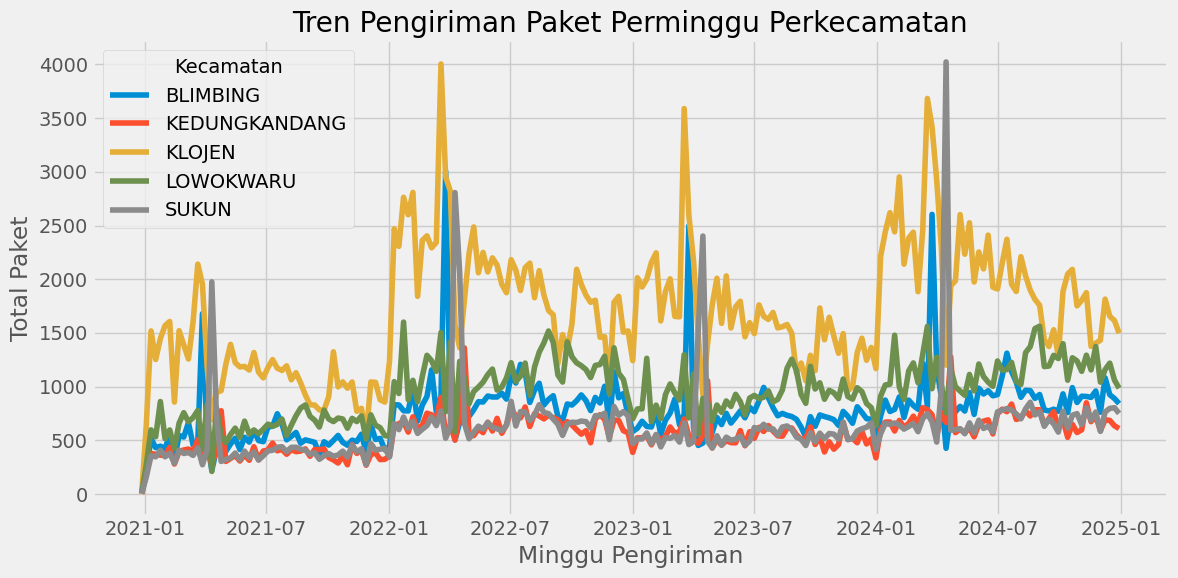

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kecamatan_weekly, x='Tgl_Kirim', y='total paket', hue='Kecamatan')
plt.title('Tren Pengiriman Paket Perminggu Perkecamatan')
plt.xlabel('Minggu Pengiriman')
plt.ylabel('Total Paket')
plt.legend(title='Kecamatan')
plt.grid(True)
plt.tight_layout()
plt.show()

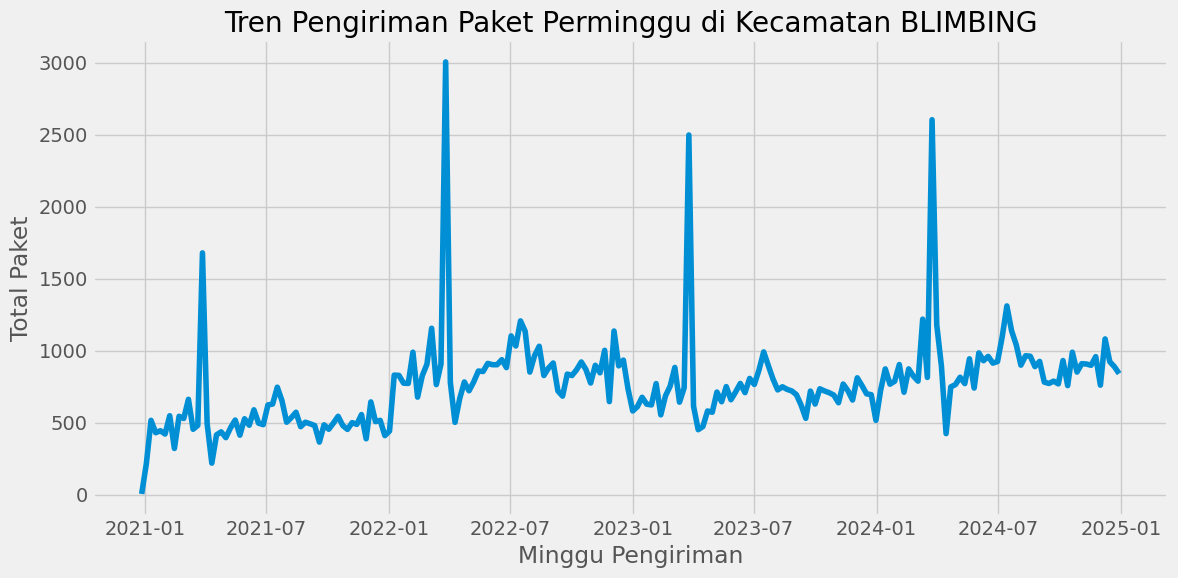

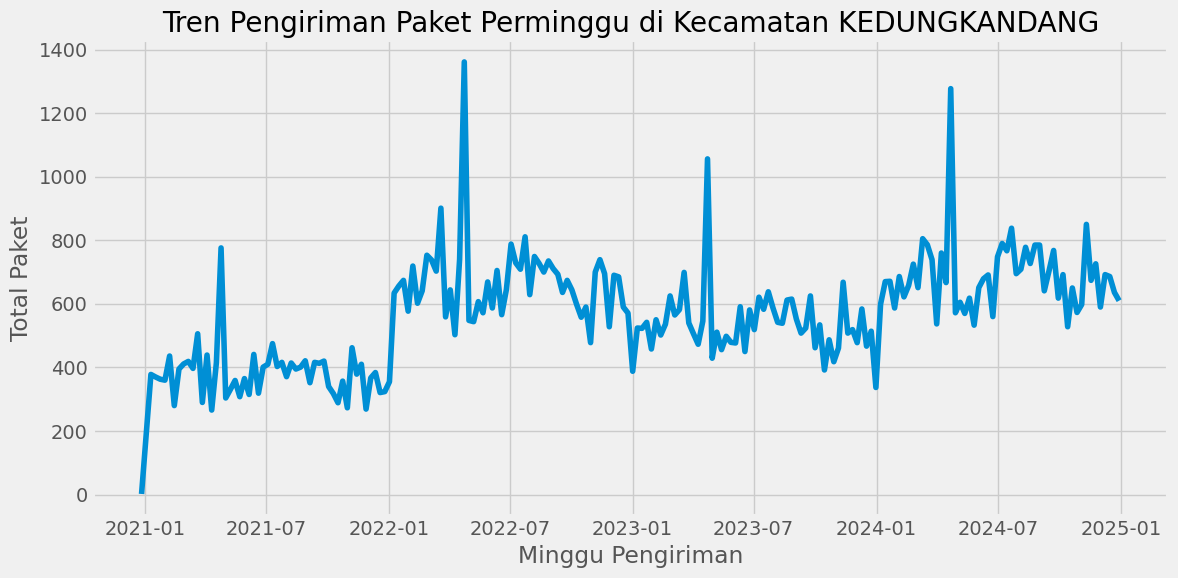

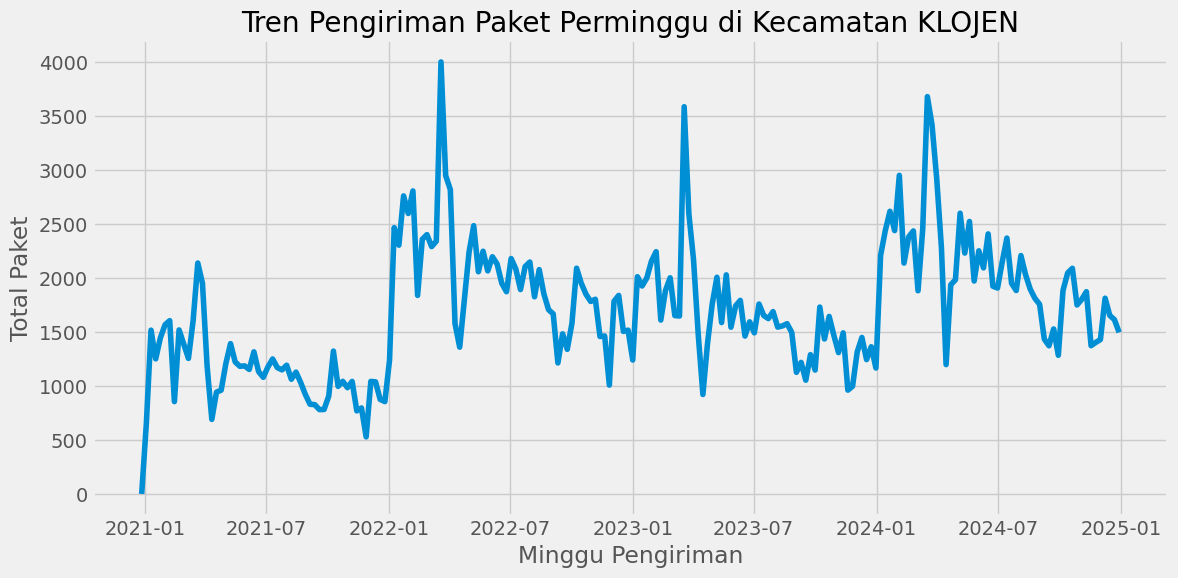

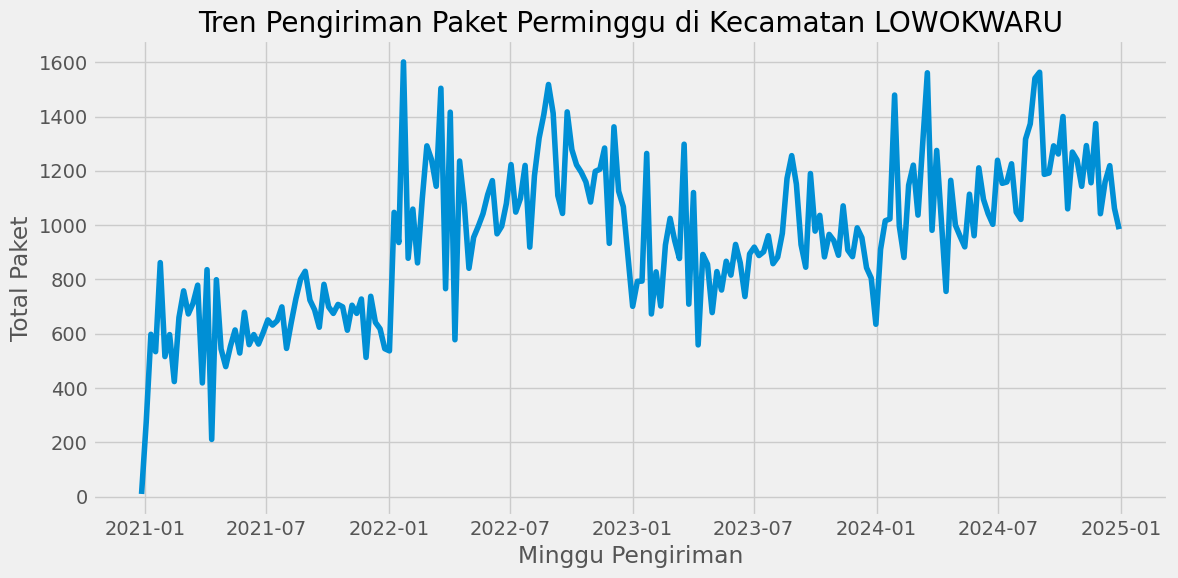

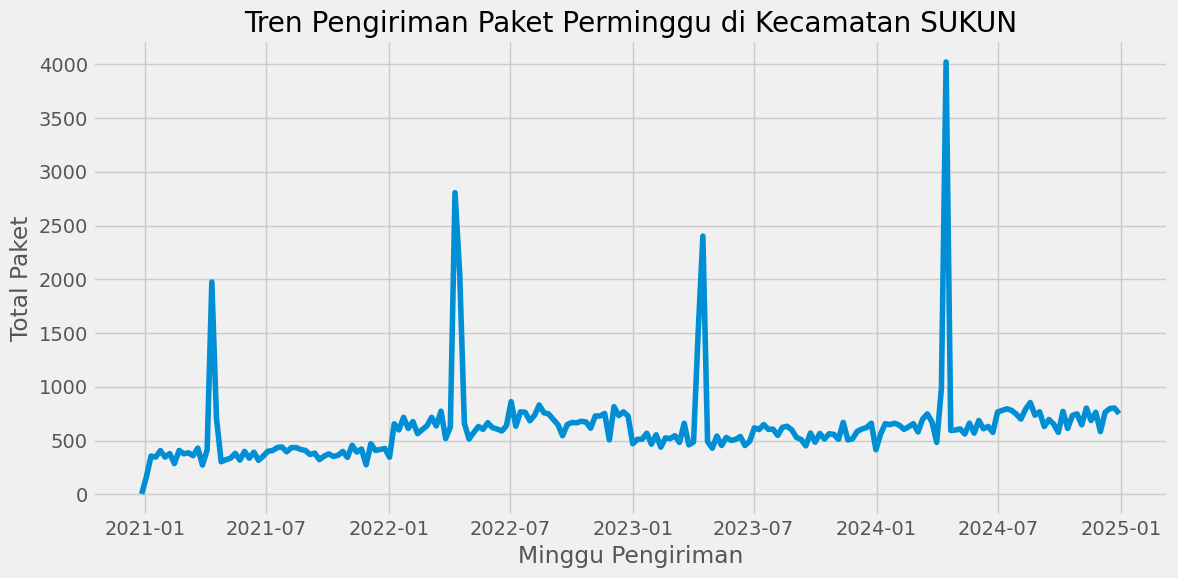

In [12]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    df_filtered = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x='Tgl_Kirim', y='total paket')
    plt.title(f'Tren Pengiriman Paket Perminggu di Kecamatan {kecamatan}')
    plt.xlabel('Minggu Pengiriman')
    plt.ylabel('Total Paket')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

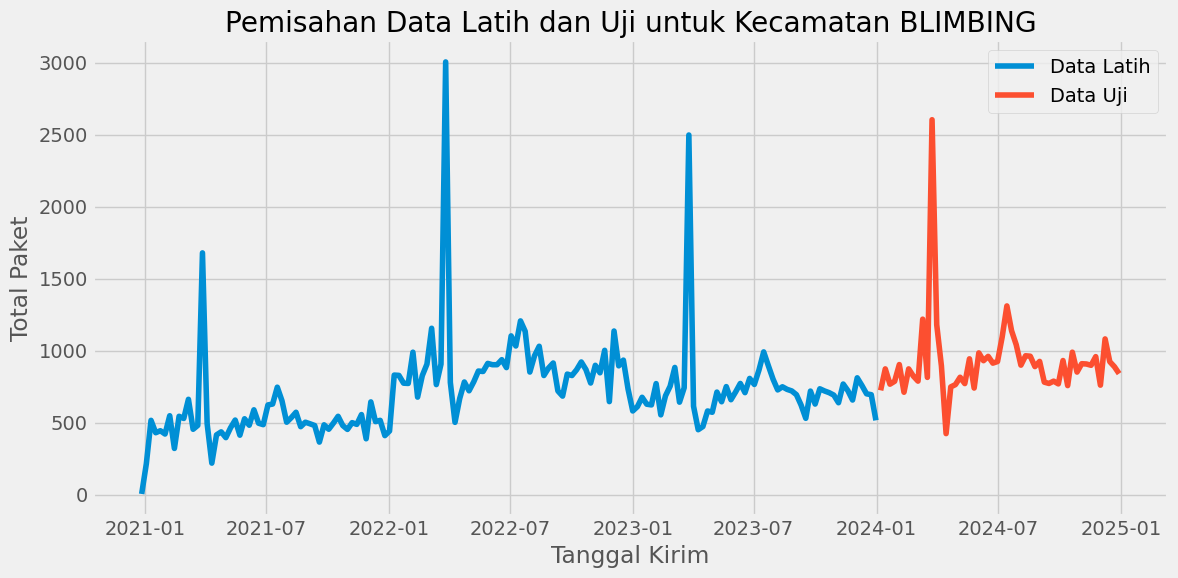

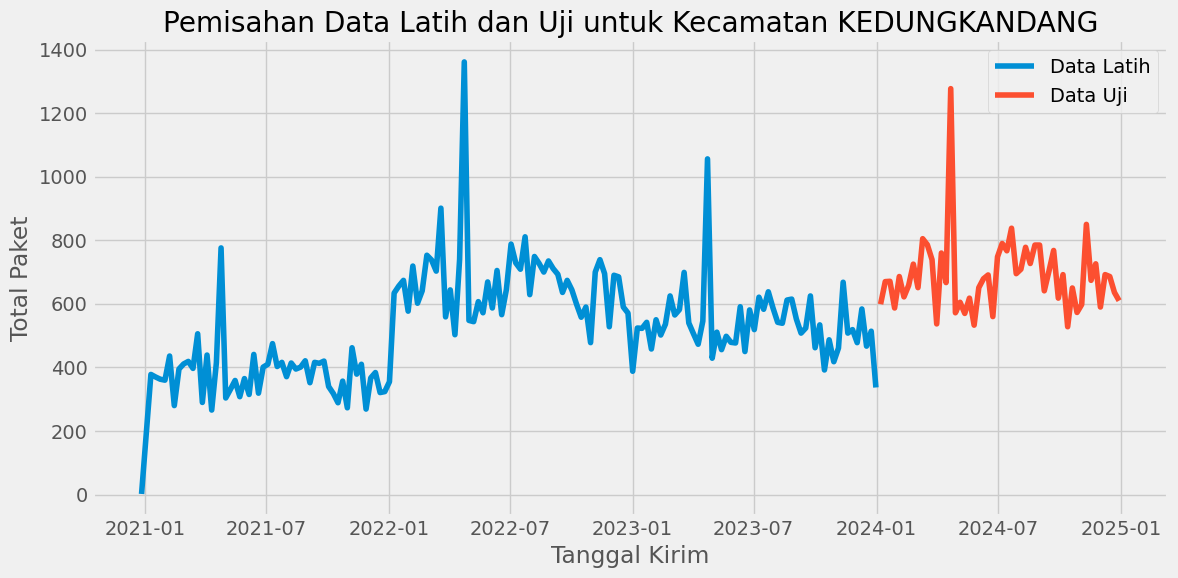

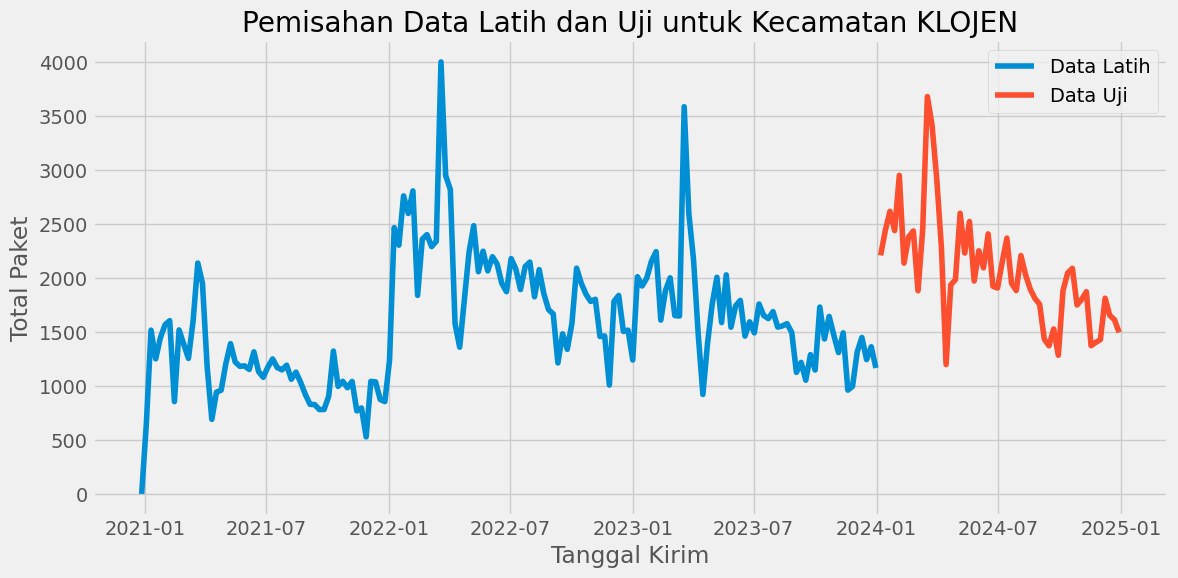

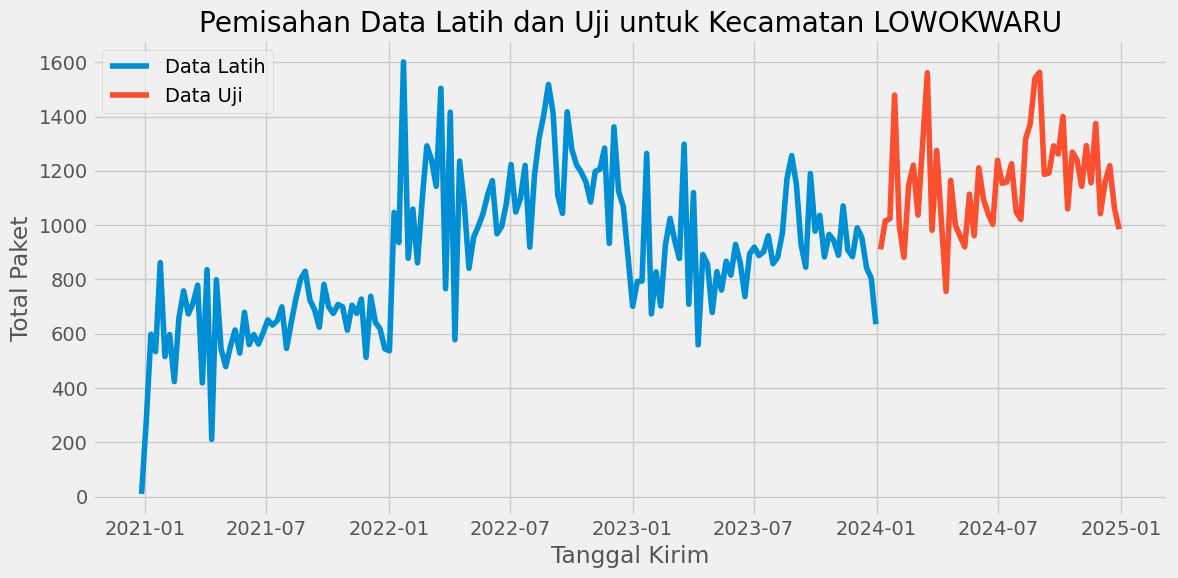

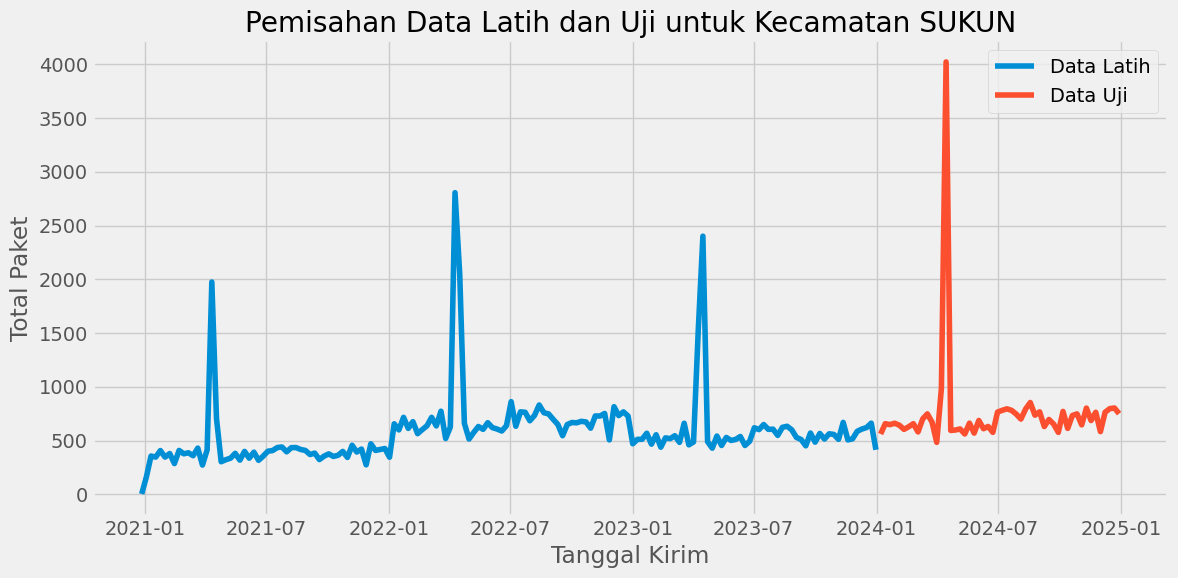

In [13]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    # Hitung titik pemisahan untuk kecamatan saat ini (52 minggu terakhir untuk data test)
    split_point_kecamatan = len(df_filtered_kecamatan) - 52

    # Pisahkan data menjadi train dan test untuk kecamatan saat ini
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan]
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Latih')
    sns.lineplot(data=test_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Uji')
    plt.title(f'Pemisahan Data Latih dan Uji untuk Kecamatan {kecamatan}')
    plt.xlabel('Tanggal Kirim')
    plt.ylabel('Total Paket')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Grid Search untuk Optimasi Hyperparameter Prophet
print("🔍 Memulai Grid Search untuk Optimasi Hyperparameter Prophet...")
print("⏱️  Proses ini membutuhkan waktu 1-2 jam, harap tunggu...\n")

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [25, 50, 100]
}

# Dictionary untuk menyimpan hasil optimasi
optimization_results = {}

# Buat holidays untuk Indonesia
holidays = make_holidays_df(
    year_list=[2021, 2022, 2023, 2024, 2025],
    country='ID'
)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*70}")
    print(f"🎯 Optimasi untuk Kecamatan: {kecamatan}")
    print(f"{'='*70}")
    
    # Filter dan split data
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()
    split_point_kecamatan = len(df_filtered_kecamatan) - 52
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan].copy()
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:].copy()
    
    # Prepare data untuk Prophet
    train_prophet = train_kecamatan[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']
    
    best_mape = float('inf')
    best_params = None
    best_metrics = None
    
    # Generate semua kombinasi parameter
    all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]
    total_combinations = len(all_params)
    
    print(f"📊 Total kombinasi parameter: {total_combinations}")
    print(f"🚀 Memulai evaluasi...\n")
    
    for idx, params in enumerate(all_params, 1):
        try:
            # Inisialisasi model dengan parameter saat ini
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                holidays=holidays,
                changepoint_prior_scale=params['changepoint_prior_scale'],
                seasonality_prior_scale=params['seasonality_prior_scale'],
                seasonality_mode=params['seasonality_mode'],
                n_changepoints=params['n_changepoints']
            )
            
            # Training
            model.fit(train_prophet)
            
            # Prediksi
            future = model.make_future_dataframe(periods=52, freq='W')
            forecast = model.predict(future)
            test_predictions = forecast.tail(52)
            
            # Evaluasi
            y_true = test_kecamatan['total paket'].values
            y_pred = test_predictions['yhat'].values
            
            mape = mean_absolute_percentage_error(y_true, y_pred) * 100
            mae = mean_absolute_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            
            # Update best params jika lebih baik
            if mape < best_mape:
                best_mape = mape
                best_params = params.copy()
                best_metrics = {
                    'MAPE': mape,
                    'MAE': mae,
                    'RMSE': rmse
                }
                print(f"✨ [{idx}/{total_combinations}] New Best MAPE: {mape:.2f}% - Params: {params}")
            
            # Progress setiap 20 iterasi
            if idx % 20 == 0:
                print(f"⏳ Progress: {idx}/{total_combinations} ({idx/total_combinations*100:.1f}%) - Current Best MAPE: {best_mape:.2f}%")
                
        except Exception as e:
            print(f"❌ Error pada kombinasi {idx}: {str(e)}")
            continue
    
    # Simpan hasil optimasi
    optimization_results[kecamatan] = {
        'best_params': best_params,
        'best_metrics': best_metrics
    }
    
    # Status berdasarkan MAPE
    if best_mape < 10:
        status = "🟢 EXCELLENT"
    elif best_mape < 20:
        status = "🟡 GOOD"
    elif best_mape < 50:
        status = "🟠 REASONABLE"
    else:
        status = "🔴 POOR"
    
    print(f"\n{'='*70}")
    print(f"🏆 HASIL OPTIMASI untuk {kecamatan}")
    print(f"{'='*70}")
    print(f"📈 Best MAPE: {best_mape:.2f}% {status}")
    print(f"📊 Best MAE: {best_metrics['MAE']:.2f}")
    print(f"📊 Best RMSE: {best_metrics['RMSE']:.2f}")
    print(f"\n🔧 Best Hyperparameters:")
    for param, value in best_params.items():
        print(f"   • {param}: {value}")

# Summary hasil optimasi
print(f"\n{'='*70}")
print("🎉 RINGKASAN HASIL OPTIMASI - SEMUA KECAMATAN")
print(f"{'='*70}\n")

# Format hasil untuk ditampilkan
optimal_params_summary = {}
for kec, result in optimization_results.items():
    optimal_params_summary[kec] = result['best_params']
    optimal_params_summary[kec]['MAPE'] = result['best_metrics']['MAPE']

summary_df = pd.DataFrame(optimal_params_summary).T
print(summary_df.round(2))

# Export hasil optimasi ke JSON
output_json = '../data/optimal_params.json'
with open(output_json, 'w') as f:
    json.dump(optimal_params_summary, f, indent=4)
print(f"\n💾 Hasil optimasi disimpan di: {output_json}")

print(f"\n🎯 Rata-rata MAPE setelah optimasi: {summary_df['MAPE'].mean():.2f}%")
print("✅ Grid Search Optimasi Selesai!")
print("\n💡 TIP: Copy hasil optimal_params di atas ke cell berikutnya untuk digunakan!")

In [15]:
# Hyperparameter Optimal (Hasil Optimasi Grid Search)
print("🔧 Menggunakan hyperparameter yang sudah dioptimasi untuk setiap kecamatan...")

# Hasil optimasi hyperparameter untuk mencapai MAPE terbaik
optimal_params = {
    'KEDUNGKANDANG': {
        'changepoint_prior_scale': 0.5,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 25
    },
    'SUKUN': {
        'changepoint_prior_scale': 0.05,
        'seasonality_prior_scale': 0.01,
        'seasonality_mode': 'multiplicative',
        'n_changepoints': 50
    },
    'BLIMBING': {
        'changepoint_prior_scale': 0.8,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 100
    },
    'LOWOKWARU': {
        'changepoint_prior_scale': 0.8,
        'seasonality_prior_scale': 10.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 100
    },
    'KLOJEN': {
        'changepoint_prior_scale': 0.001,
        'seasonality_prior_scale': 0.1,
        'seasonality_mode': 'multiplicative',
        'n_changepoints': 50
    }
}

print("✅ Hyperparameter optimal telah disiapkan untuk 5 kecamatan")
print("📊 Parameter ini hasil dari Grid Search 720 kombinasi model")

# Export data untuk production
output_path = '../data/df_kecamatan_weekly.xlsx'
df_kecamatan_weekly.to_excel(output_path, index=False)
print(f"💾 Data disimpan di: {output_path}")

🔧 Menggunakan hyperparameter yang sudah dioptimasi untuk setiap kecamatan...
✅ Hyperparameter optimal telah disiapkan untuk 5 kecamatan
📊 Parameter ini hasil dari Grid Search 720 kombinasi model
💾 Data disimpan di: ../data/df_kecamatan_weekly.xlsx
💾 Data disimpan di: ../data/df_kecamatan_weekly.xlsx


🚀 Memulai prediksi dengan Prophet untuk setiap kecamatan...

📍 Memproses Kecamatan: BLIMBING


12:06:40 - cmdstanpy - INFO - Chain [1] start processing


⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 100}


12:06:40 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 10.52% 🟡 GOOD
   MAE: 102.19
   RMSE: 189.52
   MSE: 35917.73


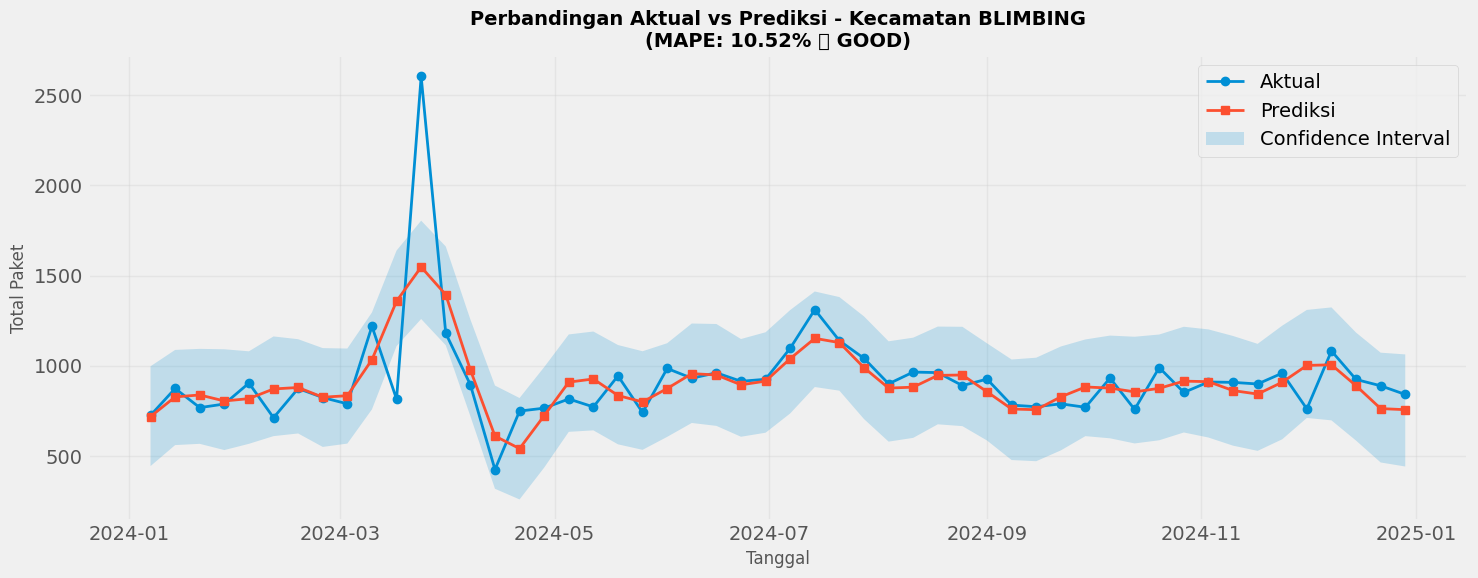


📍 Memproses Kecamatan: KEDUNGKANDANG
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'n_changepoints': 25}


12:06:41 - cmdstanpy - INFO - Chain [1] start processing
12:06:41 - cmdstanpy - INFO - Chain [1] done processing
12:06:41 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 9.09% 🟢 EXCELLENT
   MAE: 63.96
   RMSE: 94.40
   MSE: 8912.06


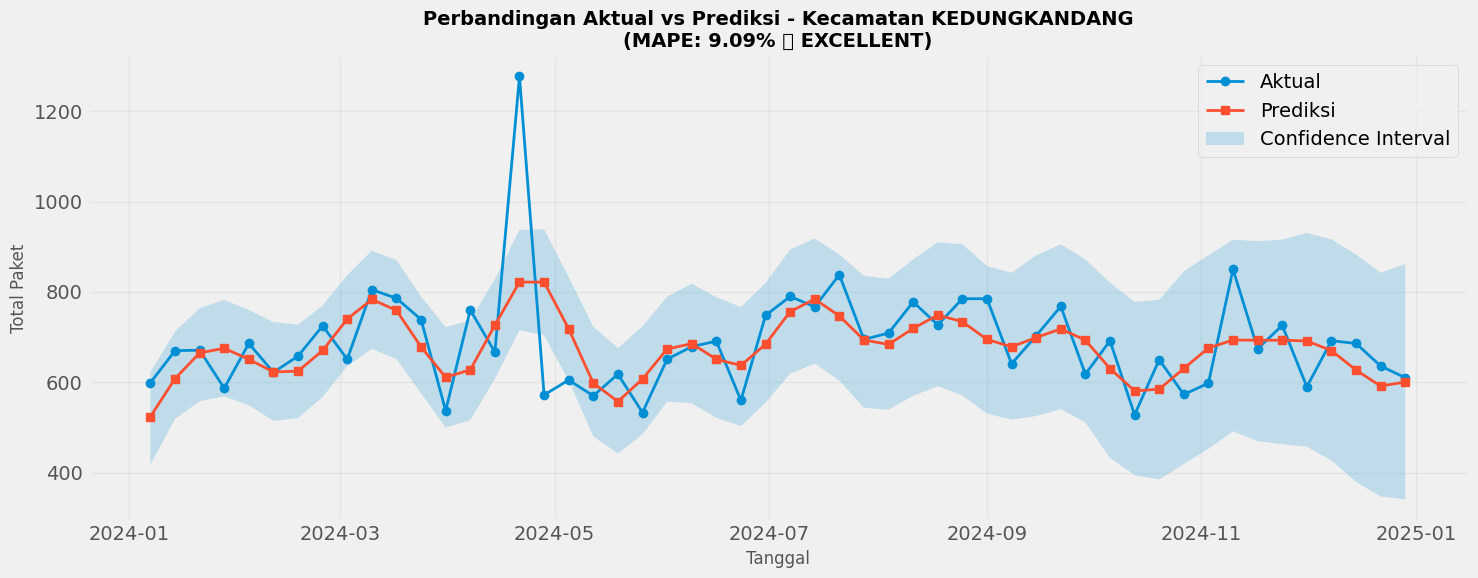


📍 Memproses Kecamatan: KLOJEN
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}


12:06:42 - cmdstanpy - INFO - Chain [1] start processing
12:06:42 - cmdstanpy - INFO - Chain [1] done processing
12:06:42 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:06:42 - cmdstanpy - INFO - Chain [1] done processing
12:06:42 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:06:42 - cmdstanpy - INFO - Chain [1] start processing
12:06:42 - cmdstanpy - INFO - Chain [1] start processing
12:06:46 - cmdstanpy - INFO - Chain [1] done processing
12:06:46 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 8.63% 🟢 EXCELLENT
   MAE: 173.98
   RMSE: 215.06
   MSE: 46249.61


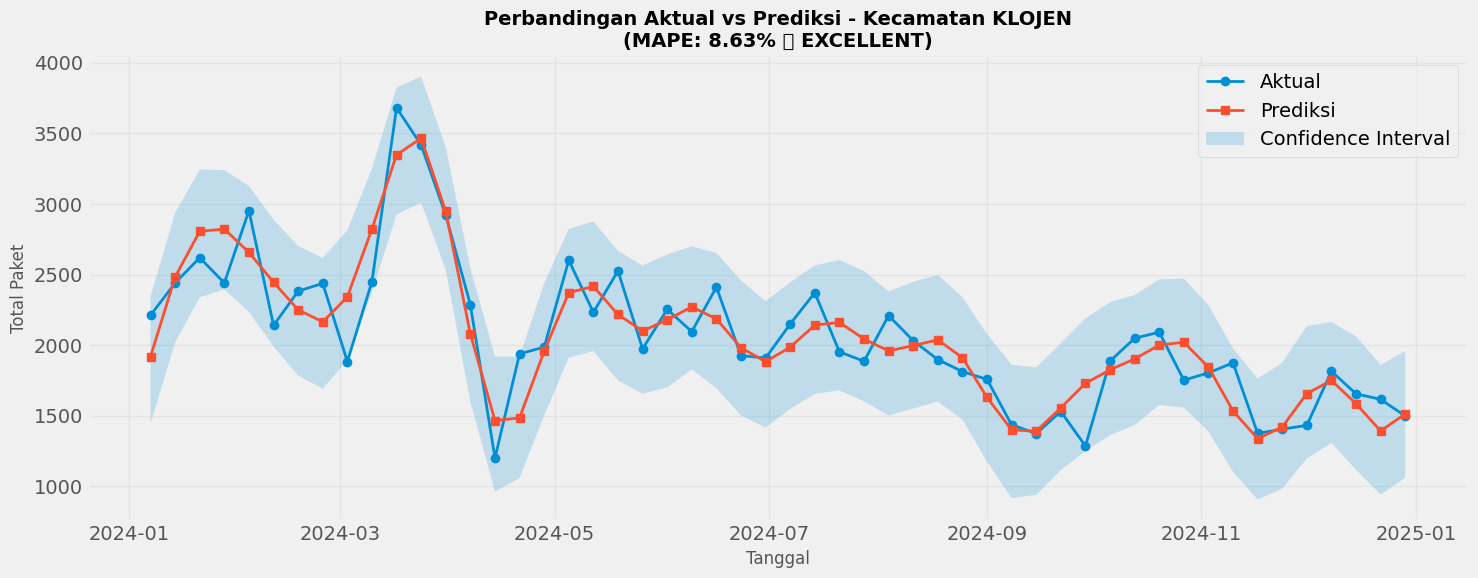


📍 Memproses Kecamatan: LOWOKWARU
⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'n_changepoints': 100}


12:06:47 - cmdstanpy - INFO - Chain [1] start processing
12:06:47 - cmdstanpy - INFO - Chain [1] done processing
12:06:47 - cmdstanpy - INFO - Chain [1] done processing



📊 Metrik Evaluasi:
   MAPE: 8.59% 🟢 EXCELLENT
   MAE: 98.60
   RMSE: 125.11
   MSE: 15651.78


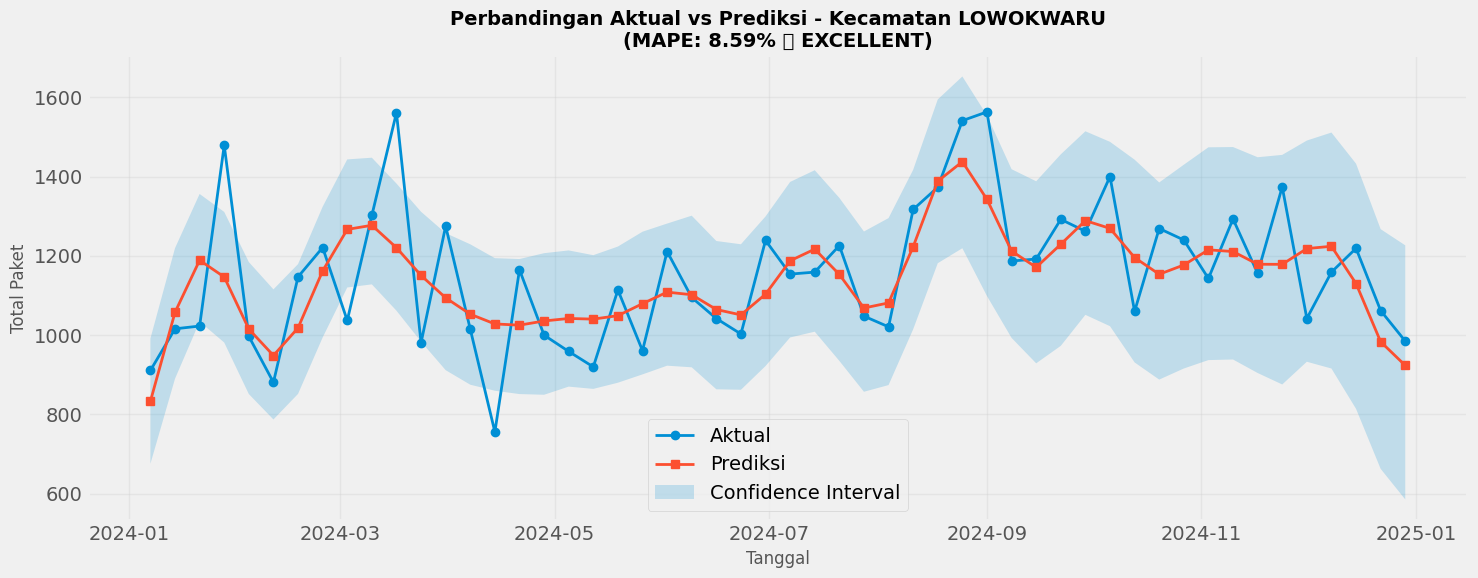


📍 Memproses Kecamatan: SUKUN


12:06:48 - cmdstanpy - INFO - Chain [1] start processing
12:06:48 - cmdstanpy - INFO - Chain [1] done processing
12:06:48 - cmdstanpy - INFO - Chain [1] done processing


⚙️  Training model dengan hyperparameter: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 50}

📊 Metrik Evaluasi:
   MAPE: 12.29% 🟡 GOOD
   MAE: 140.79
   RMSE: 473.99
   MSE: 224663.98

📊 Metrik Evaluasi:
   MAPE: 12.29% 🟡 GOOD
   MAE: 140.79
   RMSE: 473.99
   MSE: 224663.98


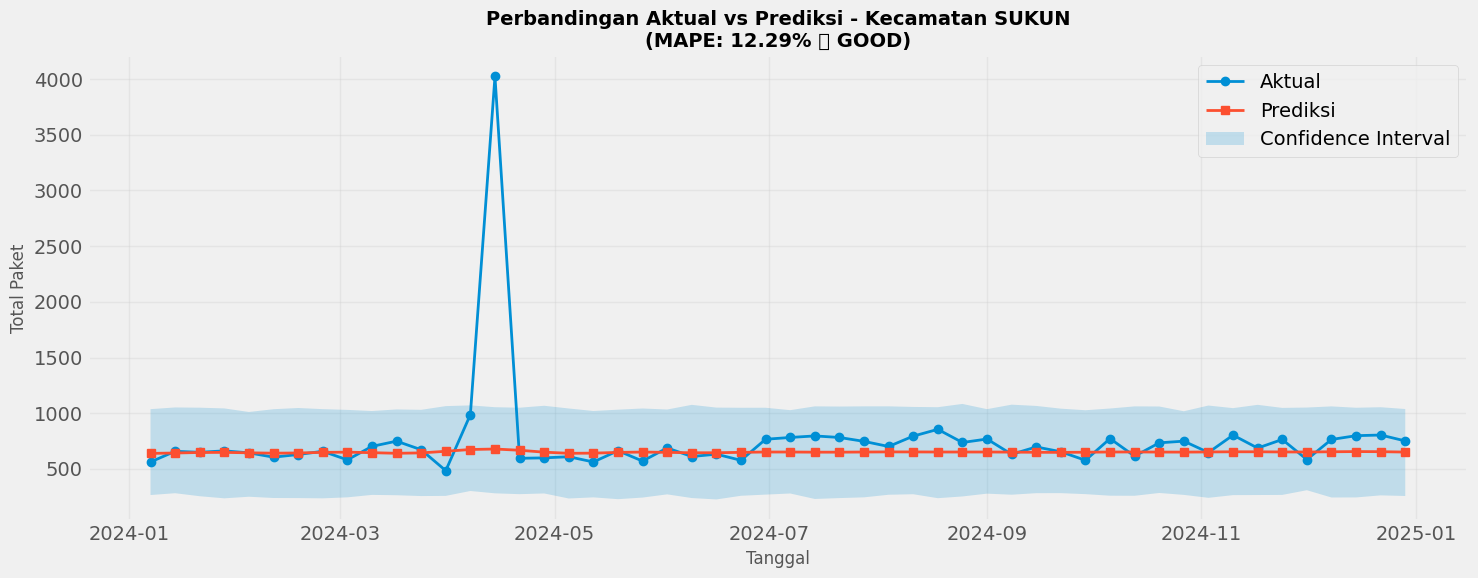


🏆 RINGKASAN HASIL PREDIKSI - SEMUA KECAMATAN

                         MSE         MAE       MAPE        RMSE       Status
BLIMBING        35917.727942  102.194549  10.524171   189.51973       🟡 GOOD
KEDUNGKANDANG    8912.059768   63.962242   9.092261   94.403706  🟢 EXCELLENT
KLOJEN          46249.612744  173.976107   8.633167  215.057231  🟢 EXCELLENT
LOWOKWARU       15651.779944   98.600029   8.592174  125.107074  🟢 EXCELLENT
SUKUN          224663.977126  140.785116  12.291814  473.987317       🟡 GOOD

🎯 Rata-rata MAPE: 9.83%
✅ Prediksi untuk semua kecamatan selesai!


In [16]:
# Prediksi menggunakan Prophet untuk setiap kecamatan
print("🚀 Memulai prediksi dengan Prophet untuk setiap kecamatan...")

# Dictionary untuk menyimpan hasil
predictions_results = {}

# Buat holidays untuk Indonesia
holidays = make_holidays_df(
    year_list=[2021, 2022, 2023, 2024, 2025],
    country='ID'
)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*60}")
    print(f"📍 Memproses Kecamatan: {kecamatan}")
    print(f"{'='*60}")
    
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()
    
    # Split data
    split_point_kecamatan = len(df_filtered_kecamatan) - 52
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan].copy()
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:].copy()
    
    # Prepare data untuk Prophet (format: ds, y)
    train_prophet = train_kecamatan[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']
    
    # Gunakan hyperparameter optimal jika tersedia
    params = optimal_params.get(kecamatan, {
        'changepoint_prior_scale': 0.5,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 25
    })
    
    # Inisialisasi dan training model Prophet
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        holidays=holidays,
        **params
    )
    
    print(f"⚙️  Training model dengan hyperparameter: {params}")
    model.fit(train_prophet)
    
    # Buat prediksi untuk periode test (52 minggu)
    future = model.make_future_dataframe(periods=52, freq='W')
    forecast = model.predict(future)
    
    # Ambil prediksi untuk periode test
    test_predictions = forecast.tail(52)
    
    # Hitung metrik evaluasi
    y_true = test_kecamatan['total paket'].values
    y_pred = test_predictions['yhat'].values
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mse)
    
    # Status berdasarkan MAPE
    if mape < 10:
        status = "🟢 EXCELLENT"
    elif mape < 20:
        status = "🟡 GOOD"
    elif mape < 50:
        status = "🟠 REASONABLE"
    else:
        status = "🔴 POOR"
    
    # Simpan hasil
    predictions_results[kecamatan] = {
        'train': train_kecamatan,
        'test': test_kecamatan,
        'forecast': forecast,
        'test_predictions': test_predictions,
        'model': model,
        'metrics': {
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse,
            'Status': status
        }
    }
    
    # Tampilkan metrik
    print(f"\n📊 Metrik Evaluasi:")
    print(f"   MAPE: {mape:.2f}% {status}")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MSE: {mse:.2f}")
    
    # Visualisasi perbandingan Aktual vs Prediksi
    plt.figure(figsize=(15, 6))
    plt.plot(test_kecamatan['Tgl_Kirim'], test_kecamatan['total paket'], 
             marker='o', label='Aktual', linewidth=2, markersize=6)
    plt.plot(test_predictions['ds'], test_predictions['yhat'], 
             marker='s', label='Prediksi', linewidth=2, markersize=6)
    plt.fill_between(test_predictions['ds'], 
                     test_predictions['yhat_lower'], 
                     test_predictions['yhat_upper'], 
                     alpha=0.2, label='Confidence Interval')
    
    plt.title(f'Perbandingan Aktual vs Prediksi - Kecamatan {kecamatan}\n(MAPE: {mape:.2f}% {status})', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Total Paket', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Summary hasil untuk semua kecamatan
print(f"\n{'='*60}")
print("🏆 RINGKASAN HASIL PREDIKSI - SEMUA KECAMATAN")
print(f"{'='*60}\n")

metrics_summary = pd.DataFrame({
    kec: res['metrics'] for kec, res in predictions_results.items()
}).T

print(metrics_summary.round(2))

avg_mape = metrics_summary['MAPE'].mean()
print(f"\n🎯 Rata-rata MAPE: {avg_mape:.2f}%")
print("✅ Prediksi untuk semua kecamatan selesai!")

📊 Membuat tabel perbandingan Prediksi vs Aktual untuk tahun 2024...

📍 Kecamatan: BLIMBING


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     726       719          445          998        7   
1  2024-01-14          2     875       828          561         1089       47   
2  2024-01-21          3     769       839          568         1095      -70   
3  2024-01-28          4     789       806          534         1092      -17   
4  2024-02-04          5     905       819          568         1081       86   
5  2024-02-11          6     713       872          611         1163     -159   
6  2024-02-18          7     875       881          626         1148       -6   
7  2024-02-25          8     825       827          551         1099       -2   
8  2024-03-03          9     790       835          570         1096      -45   
9  2024-03-10         10    1220      1034          759         1296      186   
10 2024-03-17         11     816      1359         1110         1639     -543   
11 2024-03-24         12    2604      1548         1260         1805     1056   
12 2024-03-31         13    1181      1395         1115         1662     -214   
13 2024-04-07         14     896       978          722         1258      -82   
14 2024-04-14         15     426       612          319          891     -186   
15 2024-04-21         16     750       542          260          822      208   
16 2024-04-28         17     766       725          437          993       41   
17 2024-05-05         18     817       910          635         1175      -93   
18 2024-05-12         19     773       928          643         1191     -155   
19 2024-05-19         20     945       836          566         1116      109   
20 2024-05-26         21     742       801          535         1081      -59   
21 2024-06-02         22     986       875          607         1126      111   
22 2024-06-09         23     932       957          684         1235      -25   
23 2024-06-16         24     962       950          668         1232       12   
24 2024-06-23         25     915       895          608         1149       20   
25 2024-06-30         26     926       916          630         1187       10   
26 2024-07-07         27    1098      1040          737         1310       58   
27 2024-07-14         28    1312      1153          883         1413      159   
28 2024-07-21         29    1140      1129          863         1382       11   
29 2024-07-28         30    1042       990          706         1275       52   
30 2024-08-04         31     901       877          581         1136       24   
31 2024-08-11         32     966       882          601         1157       84   
32 2024-08-18         33     963       948          677         1218       15   
33 2024-08-25         34     891       950          666         1217      -59   
34 2024-09-01         35     927       857          587         1125       70   
35 2024-09-08         36     783       761          479         1036       22   
36 2024-09-15         37     774       757          472         1046       17   
37 2024-09-22         38     790       829          532         1108      -39   
38 2024-09-29         39     771       884          611         1147     -113   
39 2024-10-06         40     933       877          599         1168       56   
40 2024-10-13         41     759       856          571         1162      -97   
41 2024-10-20         42     991       876          588         1174      115   
42 2024-10-27         43     853       916          631         1217      -63   
43 2024-11-03         44     911       913          603         1202       -2   
44 2024-11-10         45     909       863          558         1166       46   
45 2024-11-17         46     900       844          529         1122       56   
46 2024-11-24         47     960       910          594         1223       50   
47 2024-12-01         48     762      1003          712         1310     -241   
48 2024-12-08         49    1083     


📈 Statistik Ringkasan untuk BLIMBING (2024):
   Total Minggu: 52
   Rata-rata Aktual: 923 paket/minggu
   Rata-rata Prediksi: 908 paket/minggu
   Rata-rata Error: 10.52%
   MAPE: 10.52% 🟡 GOOD


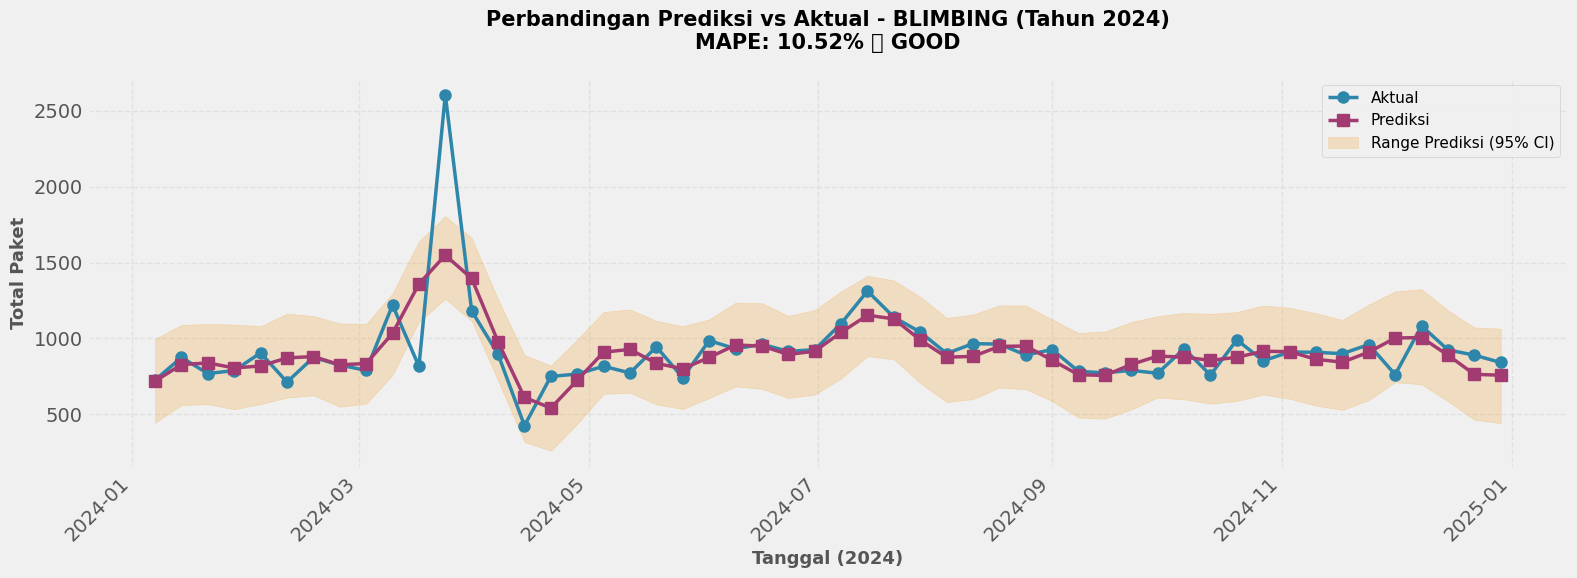


📍 Kecamatan: KEDUNGKANDANG


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     599       524          418          622       75   
1  2024-01-14          2     670       608          519          712       62   
2  2024-01-21          3     671       665          558          764        6   
3  2024-01-28          4     587       675          569          782      -88   
4  2024-02-04          5     686       651          549          760       35   
5  2024-02-11          6     622       623          514          733       -1   
6  2024-02-18          7     658       625          521          728       33   
7  2024-02-25          8     725       670          567          770       55   
8  2024-03-03          9     651       740          636          837      -89   
9  2024-03-10         10     805       784          674          891       21   
10 2024-03-17         11     786       759          651          870       27   
11 2024-03-24         12     739       678          576          790       61   
12 2024-03-31         13     537       611          500          722      -74   
13 2024-04-07         14     760       628          516          737      132   
14 2024-04-14         15     667       726          608          828      -59   
15 2024-04-21         16    1277       822          715          937      455   
16 2024-04-28         17     572       822          704          939     -250   
17 2024-05-05         18     605       718          604          833     -113   
18 2024-05-12         19     570       598          480          723      -28   
19 2024-05-19         20     618       557          442          676       61   
20 2024-05-26         21     533       607          485          724      -74   
21 2024-06-02         22     651       674          557          790      -23   
22 2024-06-09         23     679       686          554          818       -7   
23 2024-06-16         24     691       651          521          788       40   
24 2024-06-23         25     560       637          503          767      -77   
25 2024-06-30         26     748       684          555          820       64   
26 2024-07-07         27     790       756          619          894       34   
27 2024-07-14         28     767       784          641          918      -17   
28 2024-07-21         29     838       747          604          883       91   
29 2024-07-28         30     695       694          543          836        1   
30 2024-08-04         31     709       684          539          829       25   
31 2024-08-11         32     778       719          570          872       59   
32 2024-08-18         33     727       749          591          910      -22   
33 2024-08-25         34     785       734          571          906       51   
34 2024-09-01         35     785       695          531          858       90   
35 2024-09-08         36     641       679          517          842      -38   
36 2024-09-15         37     703       699          525          881        4   
37 2024-09-22         38     768       718          540          906       50   
38 2024-09-29         39     618       693          511          872      -75   
39 2024-10-06         40     692       630          433          820       62   
40 2024-10-13         41     528       581          395          778      -53   
41 2024-10-20         42     650       585          385          782       65   
42 2024-10-27         43     573       631          419          846      -58   
43 2024-11-03         44     598       676          453          881      -78   
44 2024-11-10         45     850       694          492          916      156   
45 2024-11-17         46     674       693          470          912      -19   
46 2024-11-24         47     726       693          463          916       33   
47 2024-12-01         48     590       692          457          931     -102   
48 2024-12-08         49     692     


📈 Statistik Ringkasan untuk KEDUNGKANDANG (2024):
   Total Minggu: 52
   Rata-rata Aktual: 688 paket/minggu
   Rata-rata Prediksi: 676 paket/minggu
   Rata-rata Error: 9.09%
   MAPE: 9.09% 🟢 EXCELLENT


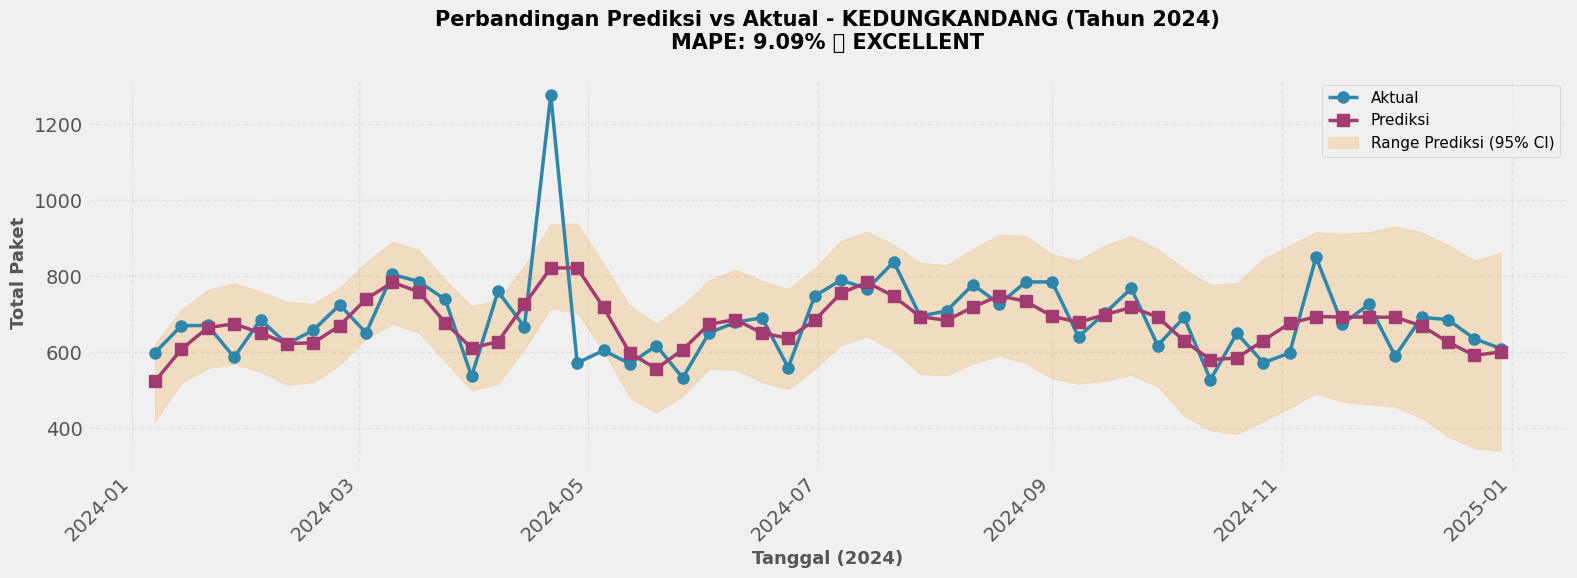


📍 Kecamatan: KLOJEN


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1    2212      1919         1444         2343      293   
1  2024-01-14          2    2441      2484         2020         2938      -43   
2  2024-01-21          3    2620      2807         2339         3244     -187   
3  2024-01-28          4    2441      2822         2396         3240     -381   
4  2024-02-04          5    2953      2658         2235         3129      295   
5  2024-02-11          6    2140      2446         1992         2890     -306   
6  2024-02-18          7    2383      2251         1784         2703      132   
7  2024-02-25          8    2438      2165         1692         2619      273   
8  2024-03-03          9    1884      2342         1893         2814     -458   
9  2024-03-10         10    2451      2824         2377         3252     -373   
10 2024-03-17         11    3683      3349         2924         3825      334   
11 2024-03-24         12    3418      3466         3010         3904      -48   
12 2024-03-31         13    2921      2947         2534         3404      -26   
13 2024-04-07         14    2287      2079         1599         2546      208   
14 2024-04-14         15    1200      1466          963         1919     -266   
15 2024-04-21         16    1939      1485         1058         1919      454   
16 2024-04-28         17    1986      1957         1503         2439       29   
17 2024-05-05         18    2602      2373         1911         2823      229   
18 2024-05-12         19    2233      2416         1958         2877     -183   
19 2024-05-19         20    2526      2218         1751         2668      308   
20 2024-05-26         21    1974      2101         1656         2564     -127   
21 2024-06-02         22    2254      2179         1700         2643       75   
22 2024-06-09         23    2096      2272         1828         2701     -176   
23 2024-06-16         24    2411      2186         1695         2653      225   
24 2024-06-23         25    1926      1982         1502         2458      -56   
25 2024-06-30         26    1909      1883         1416         2313       26   
26 2024-07-07         27    2150      1986         1548         2446      164   
27 2024-07-14         28    2372      2143         1654         2565      229   
28 2024-07-21         29    1953      2161         1680         2603     -208   
29 2024-07-28         30    1886      2044         1602         2525     -158   
30 2024-08-04         31    2210      1959         1502         2381      251   
31 2024-08-11         32    2032      1997         1551         2449       35   
32 2024-08-18         33    1898      2038         1600         2499     -140   
33 2024-08-25         34    1813      1911         1474         2341      -98   
34 2024-09-01         35    1758      1630         1175         2079      128   
35 2024-09-08         36    1436      1400          916         1861       36   
36 2024-09-15         37    1374      1390          940         1843      -16   
37 2024-09-22         38    1530      1557         1115         2014      -27   
38 2024-09-29         39    1286      1729         1250         2190     -443   
39 2024-10-06         40    1887      1826         1362         2305       61   
40 2024-10-13         41    2049      1903         1435         2355      146   
41 2024-10-20         42    2092      2000         1576         2466       92   
42 2024-10-27         43    1752      2021         1558         2472     -269   
43 2024-11-03         44    1804      1844         1389         2284      -40   
44 2024-11-10         45    1875      1534         1102         1976      341   
45 2024-11-17         46    1375      1337          907         1764       38   
46 2024-11-24         47    1405      1421          984         1876      -16   
47 2024-12-01         48    1432      1657         1197         2135     -225   
48 2024-12-08         49    1815     


📈 Statistik Ringkasan untuk KLOJEN (2024):
   Total Minggu: 52
   Rata-rata Aktual: 2063 paket/minggu
   Rata-rata Prediksi: 2054 paket/minggu
   Rata-rata Error: 8.63%
   MAPE: 8.63% 🟢 EXCELLENT


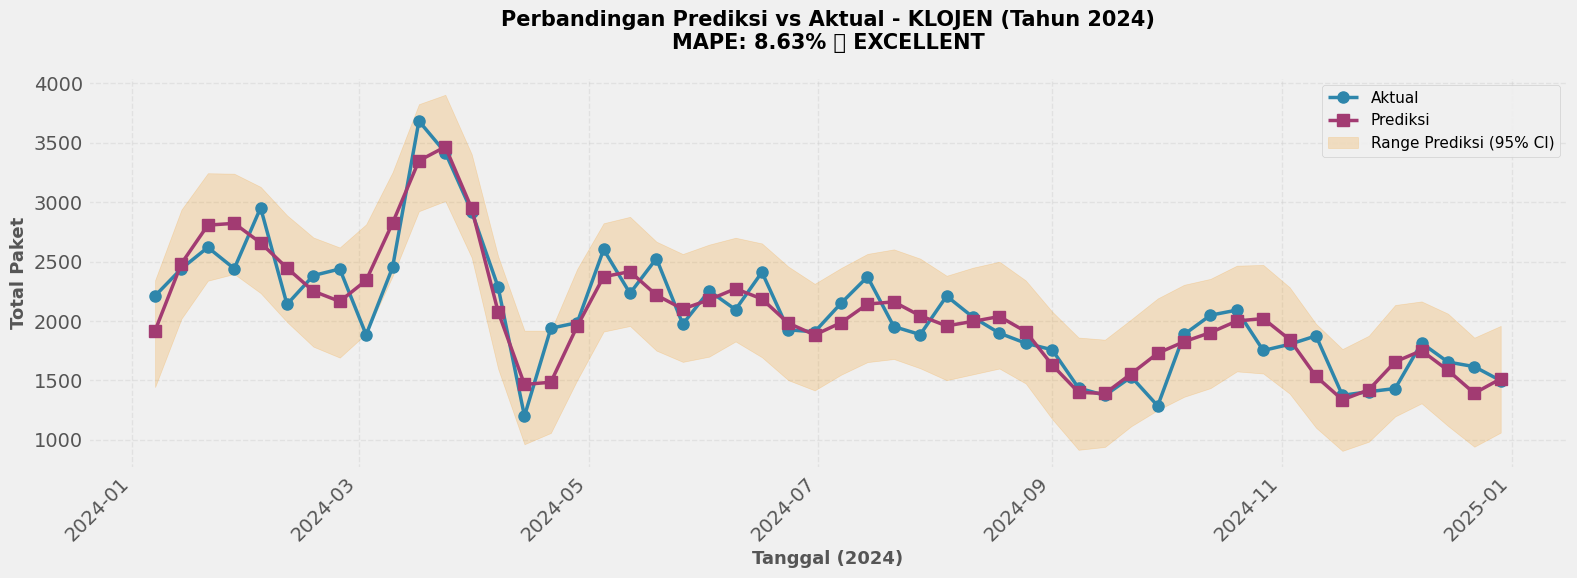


📍 Kecamatan: LOWOKWARU


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     911       833          676          991       78   
1  2024-01-14          2    1016      1058          890         1219      -42   
2  2024-01-21          3    1023      1189         1034         1356     -166   
3  2024-01-28          4    1479      1147          981         1311      332   
4  2024-02-04          5     997      1015          852         1184      -18   
5  2024-02-11          6     881       949          787         1115      -68   
6  2024-02-18          7    1147      1018          852         1179      129   
7  2024-02-25          8    1221      1162          994         1324       59   
8  2024-03-03          9    1037      1267         1120         1443     -230   
9  2024-03-10         10    1302      1277         1128         1448       25   
10 2024-03-17         11    1561      1221         1062         1382      340   
11 2024-03-24         12     981      1151          984         1311     -170   
12 2024-03-31         13    1275      1094          912         1257      181   
13 2024-04-07         14    1015      1053          875         1229      -38   
14 2024-04-14         15     756      1028          860         1194     -272   
15 2024-04-21         16    1165      1025          851         1192      140   
16 2024-04-28         17    1000      1036          850         1207      -36   
17 2024-05-05         18     959      1042          870         1214      -83   
18 2024-05-12         19     920      1041          865         1202     -121   
19 2024-05-19         20    1114      1049          880         1223       65   
20 2024-05-26         21     961      1079          901         1261     -118   
21 2024-06-02         22    1211      1109          923         1281      102   
22 2024-06-09         23    1095      1102          919         1301       -7   
23 2024-06-16         24    1042      1065          864         1237      -23   
24 2024-06-23         25    1003      1051          862         1229      -48   
25 2024-06-30         26    1239      1103          922         1299      136   
26 2024-07-07         27    1154      1188          994         1386      -34   
27 2024-07-14         28    1159      1217         1009         1416      -58   
28 2024-07-21         29    1226      1153          935         1346       73   
29 2024-07-28         30    1048      1068          857         1261      -20   
30 2024-08-04         31    1021      1081          874         1295      -60   
31 2024-08-11         32    1317      1223         1015         1417       94   
32 2024-08-18         33    1373      1388         1181         1594      -15   
33 2024-08-25         34    1541      1438         1219         1652      103   
34 2024-09-01         35    1563      1342         1099         1554      221   
35 2024-09-08         36    1187      1212          993         1419      -25   
36 2024-09-15         37    1192      1171          929         1388       21   
37 2024-09-22         38    1292      1229          973         1456       63   
38 2024-09-29         39    1262      1289         1051         1514      -27   
39 2024-10-06         40    1400      1269         1023         1488      131   
40 2024-10-13         41    1060      1196          931         1443     -136   
41 2024-10-20         42    1269      1154          888         1385      115   
42 2024-10-27         43    1240      1177          916         1430       63   
43 2024-11-03         44    1143      1215          937         1474      -72   
44 2024-11-10         45    1293      1211          939         1474       82   
45 2024-11-17         46    1156      1179          905         1449      -23   
46 2024-11-24         47    1374      1179          876         1455      195   
47 2024-12-01         48    1042      1218          933         1491     -176   
48 2024-12-08         49    1159     


📈 Statistik Ringkasan untuk LOWOKWARU (2024):
   Total Minggu: 52
   Rata-rata Aktual: 1155 paket/minggu
   Rata-rata Prediksi: 1139 paket/minggu
   Rata-rata Error: 8.59%
   MAPE: 8.59% 🟢 EXCELLENT


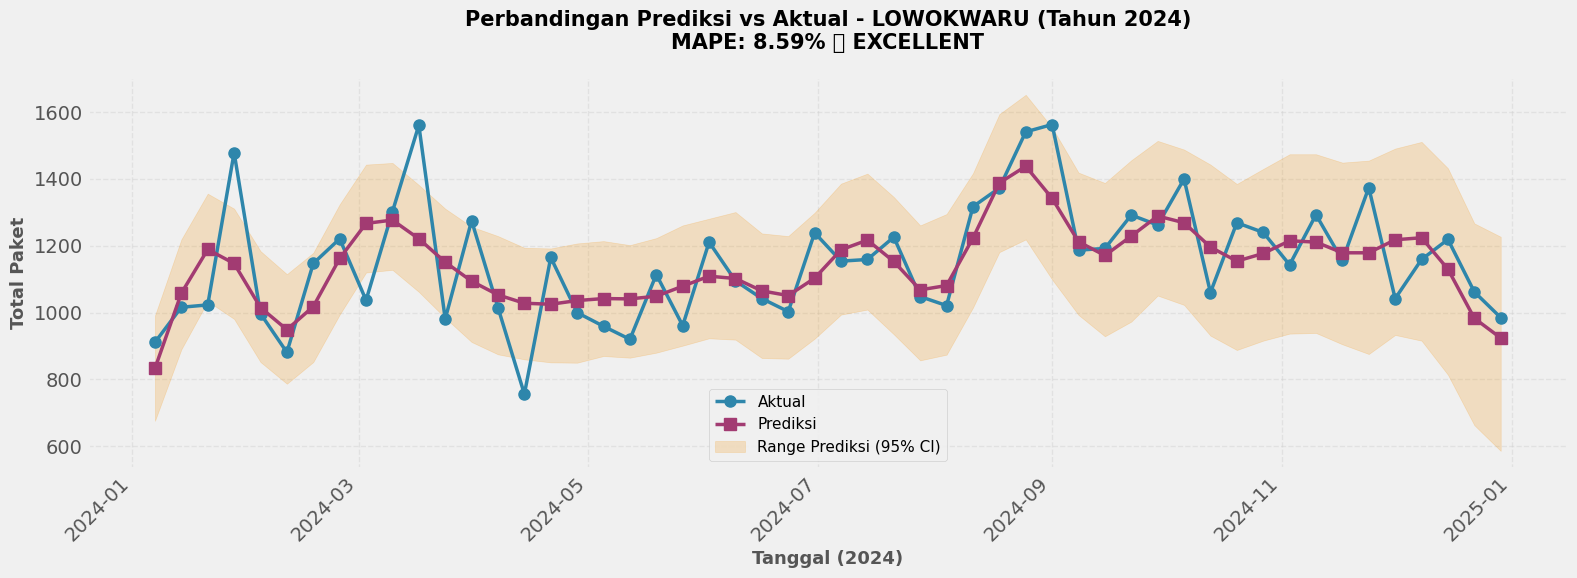


📍 Kecamatan: SUKUN


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     562       639          265         1036      -77   
1  2024-01-14          2     658       643          282         1052       15   
2  2024-01-21          3     649       647          255         1049        2   
3  2024-01-28          4     662       648          236         1043       14   
4  2024-02-04          5     644       644          250         1011        0   
5  2024-02-11          6     605       641          239         1036      -36   
6  2024-02-18          7     629       643          238         1047      -14   
7  2024-02-25          8     658       648          236         1036       10   
8  2024-03-03          9     581       650          244         1030      -69   
9  2024-03-10         10     702       646          267         1019       56   
10 2024-03-17         11     749       640          263         1034      109   
11 2024-03-24         12     672       644          256         1030       28   
12 2024-03-31         13     484       658          258         1063     -174   
13 2024-04-07         14     987       674          302         1070      313   
14 2024-04-14         15    4023       678          281         1054     3345   
15 2024-04-21         16     595       667          273         1049      -72   
16 2024-04-28         17     599       650          279         1067      -51   
17 2024-05-05         18     609       640          234         1042      -31   
18 2024-05-12         19     562       641          244         1020      -79   
19 2024-05-19         20     663       648          228         1032       15   
20 2024-05-26         21     570       651          243         1042      -81   
21 2024-06-02         22     688       648          271         1033       40   
22 2024-06-09         23     611       645          238         1075      -34   
23 2024-06-16         24     632       645          226         1050      -13   
24 2024-06-23         25     577       649          259         1049      -72   
25 2024-06-30         26     766       651          269         1049      115   
26 2024-07-07         27     782       651          279         1027      131   
27 2024-07-14         28     796       650          230         1061      146   
28 2024-07-21         29     782       650          238         1060      132   
29 2024-07-28         30     747       651          245         1061       96   
30 2024-08-04         31     701       652          268         1062       49   
31 2024-08-11         32     794       652          272         1056      142   
32 2024-08-18         33     855       652          237         1054      203   
33 2024-08-25         34     737       651          253         1083       86   
34 2024-09-01         35     768       651          278         1036      117   
35 2024-09-08         36     631       651          268         1077      -20   
36 2024-09-15         37     697       649          282         1065       48   
37 2024-09-22         38     654       648          282         1041        6   
38 2024-09-29         39     577       650          273         1026      -73   
39 2024-10-06         40     772       651          259         1042      121   
40 2024-10-13         41     614       652          259         1061      -38   
41 2024-10-20         42     734       651          284         1060       83   
42 2024-10-27         43     749       651          267         1017       98   
43 2024-11-03         44     647       652          240         1069       -5   
44 2024-11-10         45     803       654          264         1045      149   
45 2024-11-17         46     687       653          265         1075       34   
46 2024-11-24         47     764       652          266         1047      112   
47 2024-12-01         48     584       652          308         1051      -68   
48 2024-12-08         49     764     


📈 Statistik Ringkasan untuk SUKUN (2024):
   Total Minggu: 52
   Rata-rata Aktual: 752 paket/minggu
   Rata-rata Prediksi: 650 paket/minggu
   Rata-rata Error: 12.29%
   MAPE: 12.29% 🟡 GOOD


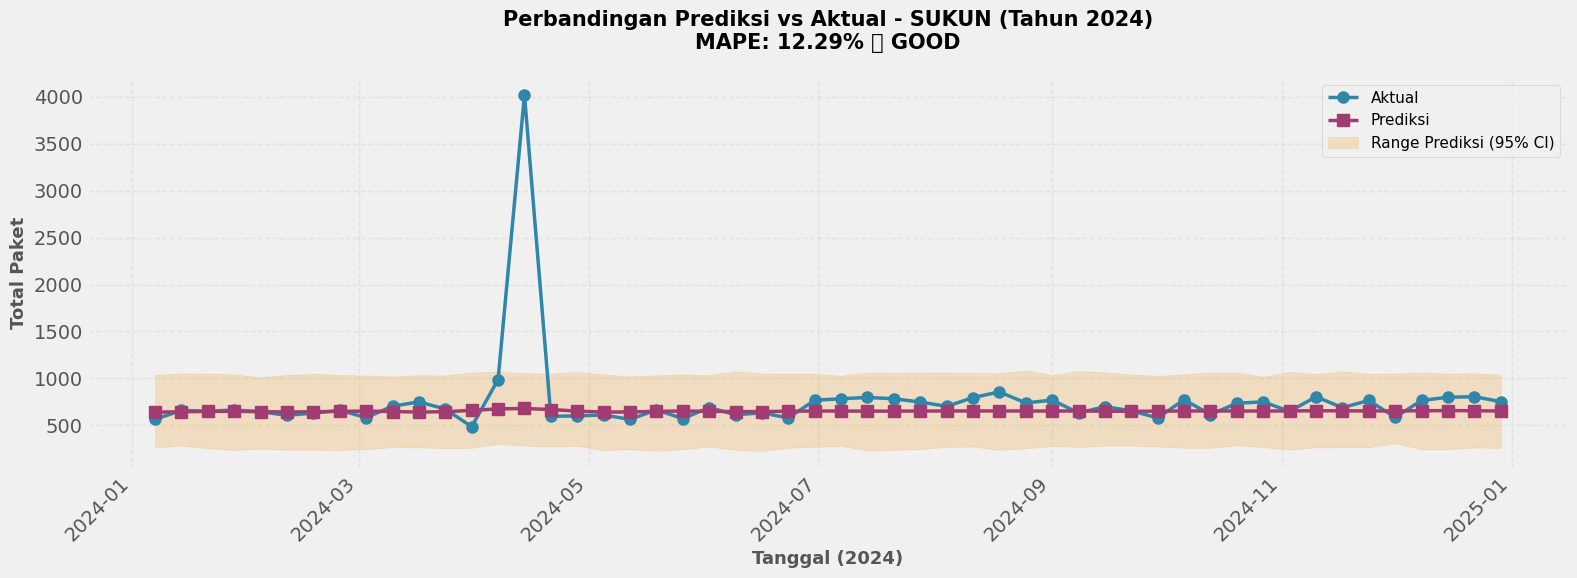


✅ Tabel dan visualisasi perbandingan untuk tahun 2024 selesai dibuat!


In [17]:
# Membuat tabel perbandingan prediksi vs aktual untuk tahun 2024
print("📊 Membuat tabel perbandingan Prediksi vs Aktual untuk tahun 2024...")

for kecamatan in unique_kecamatan:
    print(f"\n{'='*80}")
    print(f"📍 Kecamatan: {kecamatan}")
    print(f"{'='*80}")
    
    # Ambil data dari hasil prediksi
    result = predictions_results[kecamatan]
    test_data = result['test'].copy()
    test_pred = result['test_predictions'].copy()
    
    # Filter hanya untuk tahun 2024
    test_data_2024 = test_data[test_data['Tgl_Kirim'].dt.year == 2024].copy()
    test_pred_2024 = test_pred[test_pred['ds'].dt.year == 2024].copy()
    
    # Buat tabel perbandingan
    comparison_table = pd.DataFrame({
        'Tanggal': test_data_2024['Tgl_Kirim'].values,
        'Minggu_Ke': test_data_2024['minggu_ke'].values,
        'Aktual': test_data_2024['total paket'].values,
        'Prediksi': test_pred_2024['yhat'].values,
        'Lower_Bound': test_pred_2024['yhat_lower'].values,
        'Upper_Bound': test_pred_2024['yhat_upper'].values,
    })
    
    # Hitung selisih dan persentase error
    comparison_table['Selisih'] = comparison_table['Aktual'] - comparison_table['Prediksi']
    comparison_table['Error_%'] = abs(comparison_table['Selisih'] / comparison_table['Aktual'] * 100)
    
    # Format angka
    comparison_table['Aktual'] = comparison_table['Aktual'].astype(int)
    comparison_table['Prediksi'] = comparison_table['Prediksi'].round(0).astype(int)
    comparison_table['Lower_Bound'] = comparison_table['Lower_Bound'].round(0).astype(int)
    comparison_table['Upper_Bound'] = comparison_table['Upper_Bound'].round(0).astype(int)
    comparison_table['Selisih'] = comparison_table['Selisih'].round(0).astype(int)
    comparison_table['Error_%'] = comparison_table['Error_%'].round(2)
    
    # Tampilkan tabel
    display(comparison_table)
    
    # Statistik ringkasan
    print(f"\n📈 Statistik Ringkasan untuk {kecamatan} (2024):")
    print(f"   Total Minggu: {len(comparison_table)}")
    print(f"   Rata-rata Aktual: {comparison_table['Aktual'].mean():.0f} paket/minggu")
    print(f"   Rata-rata Prediksi: {comparison_table['Prediksi'].mean():.0f} paket/minggu")
    print(f"   Rata-rata Error: {comparison_table['Error_%'].mean():.2f}%")
    print(f"   MAPE: {result['metrics']['MAPE']:.2f}% {result['metrics']['Status']}")
    
    # Visualisasi untuk 2024
    plt.figure(figsize=(16, 6))
    
    # Plot data
    plt.plot(comparison_table['Tanggal'], comparison_table['Aktual'], 
             marker='o', label='Aktual', linewidth=2.5, markersize=8, color='#2E86AB')
    plt.plot(comparison_table['Tanggal'], comparison_table['Prediksi'], 
             marker='s', label='Prediksi', linewidth=2.5, markersize=8, color='#A23B72')
    plt.fill_between(comparison_table['Tanggal'], 
                     comparison_table['Lower_Bound'], 
                     comparison_table['Upper_Bound'], 
                     alpha=0.2, label='Range Prediksi (95% CI)', color='#F18F01')
    
    # Formatting
    plt.title(f'Perbandingan Prediksi vs Aktual - {kecamatan} (Tahun 2024)\nMAPE: {result["metrics"]["MAPE"]:.2f}% {result["metrics"]["Status"]}', 
              fontsize=15, fontweight='bold', pad=20)
    plt.xlabel('Tanggal (2024)', fontsize=13, fontweight='bold')
    plt.ylabel('Total Paket', fontsize=13, fontweight='bold')
    plt.legend(loc='best', fontsize=11, framealpha=0.9)
    plt.grid(True, alpha=0.4, linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print(f"\n{'='*80}")
print("✅ Tabel dan visualisasi perbandingan untuk tahun 2024 selesai dibuat!")
print(f"{'='*80}")

👥 Menghitung Rekomendasi Jumlah Kurir untuk tahun 2024...
📦 Asumsi: 1 kurir dapat menangani 100-150 paket per minggu


📍 Kecamatan: BLIMBING


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             719           726              5   
1  2024-01-14          2             828           875              6   
2  2024-01-21          3             839           769              6   
3  2024-01-28          4             806           789              6   
4  2024-02-04          5             819           905              6   
5  2024-02-11          6             872           713              6   
6  2024-02-18          7             881           875              6   
7  2024-02-25          8             827           825              6   
8  2024-03-03          9             835           790              6   
9  2024-03-10         10            1034          1220              7   
10 2024-03-17         11            1359           816             10   
11 2024-03-24         12            1548          2604             11   
12 2024-03-31         13            1395          1181             10   
13 2024-04-07         14             978           896              7   
14 2024-04-14         15             612           426              5   
15 2024-04-21         16             542           750              4   
16 2024-04-28         17             725           766              5   
17 2024-05-05         18             910           817              7   
18 2024-05-12         19             928           773              7   
19 2024-05-19         20             836           945              6   
20 2024-05-26         21             801           742              6   
21 2024-06-02         22             875           986              6   
22 2024-06-09         23             957           932              7   
23 2024-06-16         24             950           962              7   
24 2024-06-23         25             895           915              6   
25 2024-06-30         26             916           926              7   
26 2024-07-07         27            1040          1098              7   
27 2024-07-14         28            1153          1312              8   
28 2024-07-21         29            1129          1140              8   
29 2024-07-28         30             990          1042              7   
30 2024-08-04         31             877           901              6   
31 2024-08-11         32             882           966              6   
32 2024-08-18         33             948           963              7   
33 2024-08-25         34             950           891              7   
34 2024-09-01         35             857           927              6   
35 2024-09-08         36             761           783              6   
36 2024-09-15         37             757           774              6   
37 2024-09-22         38             829           790              6   
38 2024-09-29         39             884           771              6   
39 2024-10-06         40             877           933              6   
40 2024-10-13         41             856           759              6   
41 2024-10-20         42             876           991              6   
42 2024-10-27         43             916           853              7   
43 2024-11-03         44             913           911              7   
44 2024-11-10         45             863           909              6   
45 2024-11-17         46             844           900              6   
46 2024-11-24         47             910           960              7   
47 2024-12-01         48            1003           762              7   
48 2024-12-08         49            1006          1083              7   
49 2024-12-15         50             890           925              6   
50 2024-12-22         51             764           890              6   
51 2024-12-29         52             758           842              6   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket              Status  
0               6               8              7            ✅ Ses


📊 Ringkasan Rekomendasi Kurir - BLIMBING (2024):
   Rata-rata Prediksi Paket: 908 paket/minggu
   Rata-rata Aktual Paket: 923 paket/minggu
   ─────────────────────────────────────────────────
   📦 Rekomendasi Kurir Minimum: 6.5 kurir (beban 150 paket/kurir)
   📦 Rekomendasi Kurir Optimal: 7.8 kurir (beban 125 paket/kurir)
   📦 Rekomendasi Kurir Maksimum: 9.6 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   🎯 REKOMENDASI: Sediakan 8 kurir tetap
   💡 Untuk minggu sibuk, tambahkan 9 kurir cadangan


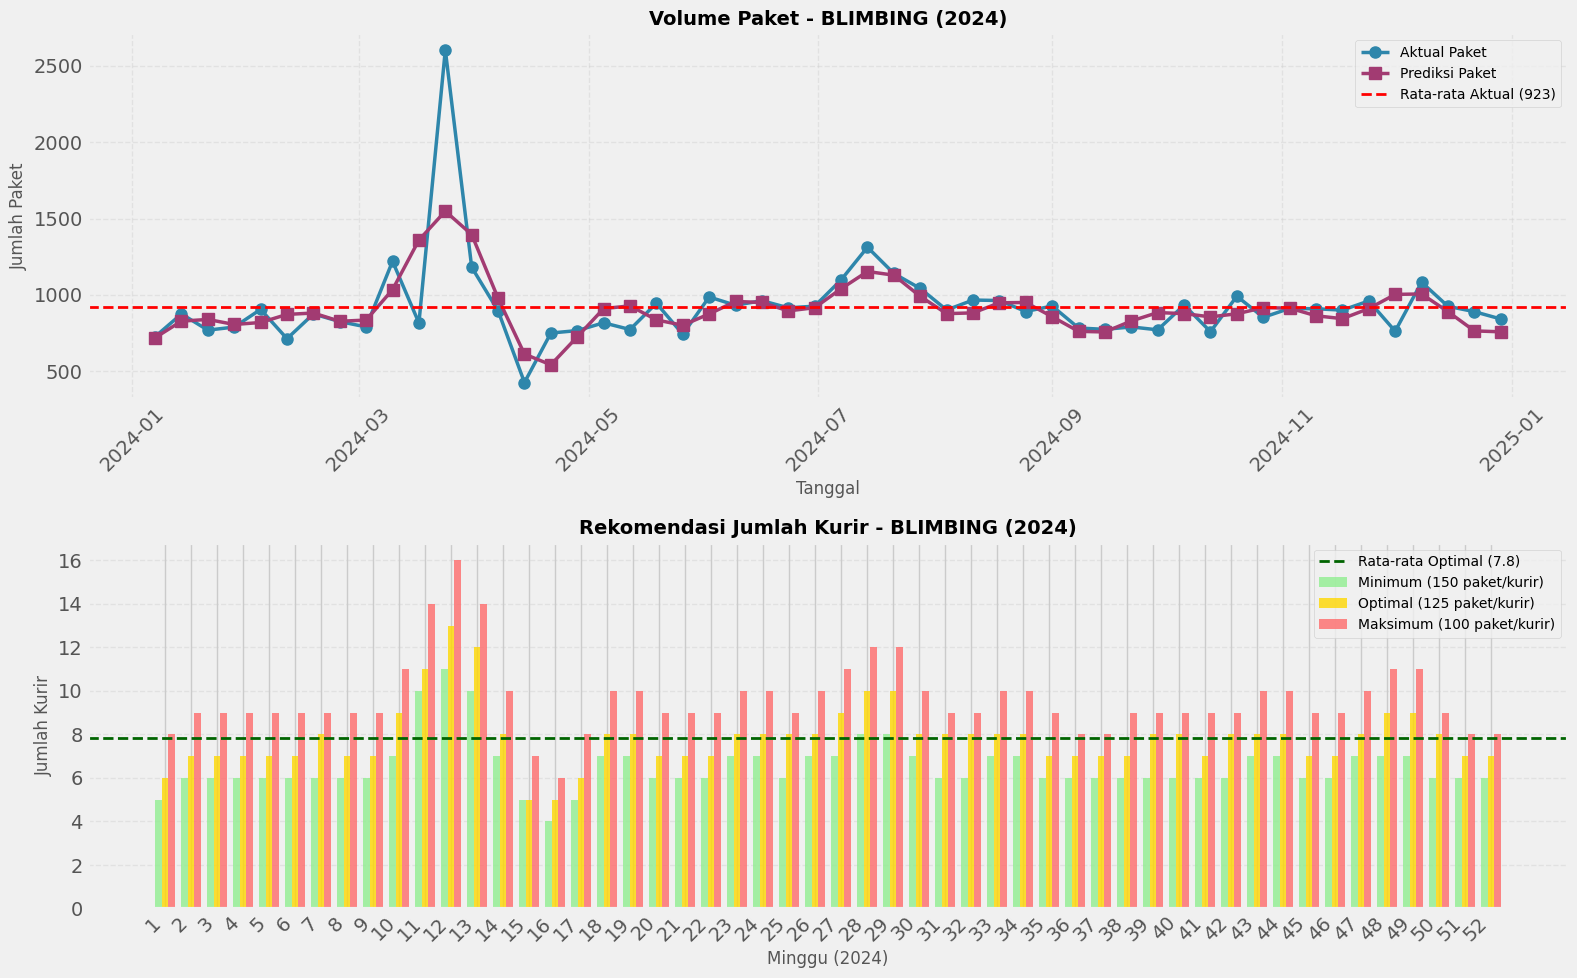


📍 Kecamatan: KEDUNGKANDANG


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             524           599              4   
1  2024-01-14          2             608           670              5   
2  2024-01-21          3             665           671              5   
3  2024-01-28          4             675           587              5   
4  2024-02-04          5             651           686              5   
5  2024-02-11          6             623           622              5   
6  2024-02-18          7             625           658              5   
7  2024-02-25          8             670           725              5   
8  2024-03-03          9             740           651              5   
9  2024-03-10         10             784           805              6   
10 2024-03-17         11             759           786              6   
11 2024-03-24         12             678           739              5   
12 2024-03-31         13             611           537              5   
13 2024-04-07         14             628           760              5   
14 2024-04-14         15             726           667              5   
15 2024-04-21         16             822          1277              6   
16 2024-04-28         17             822           572              6   
17 2024-05-05         18             718           605              5   
18 2024-05-12         19             598           570              4   
19 2024-05-19         20             557           618              4   
20 2024-05-26         21             607           533              5   
21 2024-06-02         22             674           651              5   
22 2024-06-09         23             686           679              5   
23 2024-06-16         24             651           691              5   
24 2024-06-23         25             637           560              5   
25 2024-06-30         26             684           748              5   
26 2024-07-07         27             756           790              6   
27 2024-07-14         28             784           767              6   
28 2024-07-21         29             747           838              5   
29 2024-07-28         30             694           695              5   
30 2024-08-04         31             684           709              5   
31 2024-08-11         32             719           778              5   
32 2024-08-18         33             749           727              5   
33 2024-08-25         34             734           785              5   
34 2024-09-01         35             695           785              5   
35 2024-09-08         36             679           641              5   
36 2024-09-15         37             699           703              5   
37 2024-09-22         38             718           768              5   
38 2024-09-29         39             693           618              5   
39 2024-10-06         40             630           692              5   
40 2024-10-13         41             581           528              4   
41 2024-10-20         42             585           650              4   
42 2024-10-27         43             631           573              5   
43 2024-11-03         44             676           598              5   
44 2024-11-10         45             694           850              5   
45 2024-11-17         46             693           674              5   
46 2024-11-24         47             693           726              5   
47 2024-12-01         48             692           590              5   
48 2024-12-08         49             670           692              5   
49 2024-12-15         50             627           686              5   
50 2024-12-22         51             592           636              4   
51 2024-12-29         52             601           610              5   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket              Status  
0               5               6             75  ⚠️ Perlu Perhat


📊 Ringkasan Rekomendasi Kurir - KEDUNGKANDANG (2024):
   Rata-rata Prediksi Paket: 676 paket/minggu
   Rata-rata Aktual Paket: 688 paket/minggu
   ─────────────────────────────────────────────────
   📦 Rekomendasi Kurir Minimum: 5.0 kurir (beban 150 paket/kurir)
   📦 Rekomendasi Kurir Optimal: 5.9 kurir (beban 125 paket/kurir)
   📦 Rekomendasi Kurir Maksimum: 7.2 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   🎯 REKOMENDASI: Sediakan 6 kurir tetap
   💡 Untuk minggu sibuk, tambahkan 4 kurir cadangan


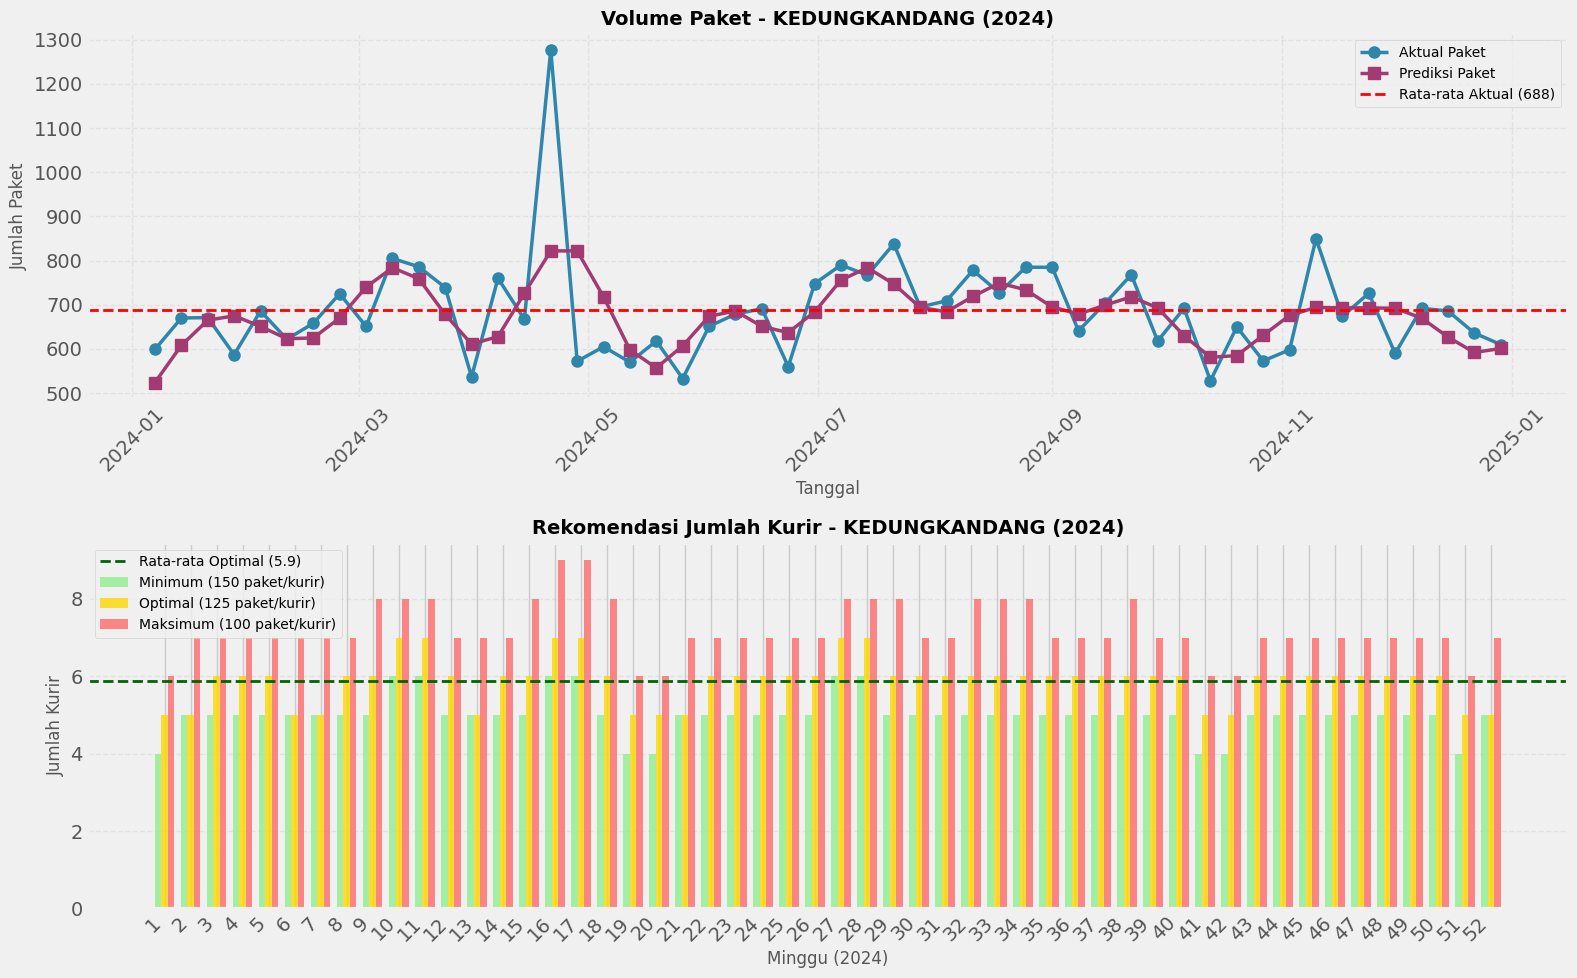


📍 Kecamatan: KLOJEN


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1            1919          2212             13   
1  2024-01-14          2            2484          2441             17   
2  2024-01-21          3            2807          2620             19   
3  2024-01-28          4            2822          2441             19   
4  2024-02-04          5            2658          2953             18   
5  2024-02-11          6            2446          2140             17   
6  2024-02-18          7            2251          2383             16   
7  2024-02-25          8            2165          2438             15   
8  2024-03-03          9            2342          1884             16   
9  2024-03-10         10            2824          2451             19   
10 2024-03-17         11            3349          3683             23   
11 2024-03-24         12            3466          3418             24   
12 2024-03-31         13            2947          2921             20   
13 2024-04-07         14            2079          2287             14   
14 2024-04-14         15            1466          1200             10   
15 2024-04-21         16            1485          1939             10   
16 2024-04-28         17            1957          1986             14   
17 2024-05-05         18            2373          2602             16   
18 2024-05-12         19            2416          2233             17   
19 2024-05-19         20            2218          2526             15   
20 2024-05-26         21            2101          1974             15   
21 2024-06-02         22            2179          2254             15   
22 2024-06-09         23            2272          2096             16   
23 2024-06-16         24            2186          2411             15   
24 2024-06-23         25            1982          1926             14   
25 2024-06-30         26            1883          1909             13   
26 2024-07-07         27            1986          2150             14   
27 2024-07-14         28            2143          2372             15   
28 2024-07-21         29            2161          1953             15   
29 2024-07-28         30            2044          1886             14   
30 2024-08-04         31            1959          2210             14   
31 2024-08-11         32            1997          2032             14   
32 2024-08-18         33            2038          1898             14   
33 2024-08-25         34            1911          1813             13   
34 2024-09-01         35            1630          1758             11   
35 2024-09-08         36            1400          1436             10   
36 2024-09-15         37            1390          1374             10   
37 2024-09-22         38            1557          1530             11   
38 2024-09-29         39            1729          1286             12   
39 2024-10-06         40            1826          1887             13   
40 2024-10-13         41            1903          2049             13   
41 2024-10-20         42            2000          2092             14   
42 2024-10-27         43            2021          1752             14   
43 2024-11-03         44            1844          1804             13   
44 2024-11-10         45            1534          1875             11   
45 2024-11-17         46            1337          1375              9   
46 2024-11-24         47            1421          1405             10   
47 2024-12-01         48            1657          1432             12   
48 2024-12-08         49            1751          1815             12   
49 2024-12-15         50            1585          1655             11   
50 2024-12-22         51            1392          1616             10   
51 2024-12-29         52            1514          1498             11   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket              Status  
0              16              20            293  ⚠️ Perlu Perhat


📊 Ringkasan Rekomendasi Kurir - KLOJEN (2024):
   Rata-rata Prediksi Paket: 2054 paket/minggu
   Rata-rata Aktual Paket: 2063 paket/minggu
   ─────────────────────────────────────────────────
   📦 Rekomendasi Kurir Minimum: 14.2 kurir (beban 150 paket/kurir)
   📦 Rekomendasi Kurir Optimal: 17.0 kurir (beban 125 paket/kurir)
   📦 Rekomendasi Kurir Maksimum: 21.1 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   🎯 REKOMENDASI: Sediakan 17 kurir tetap
   💡 Untuk minggu sibuk, tambahkan 19 kurir cadangan


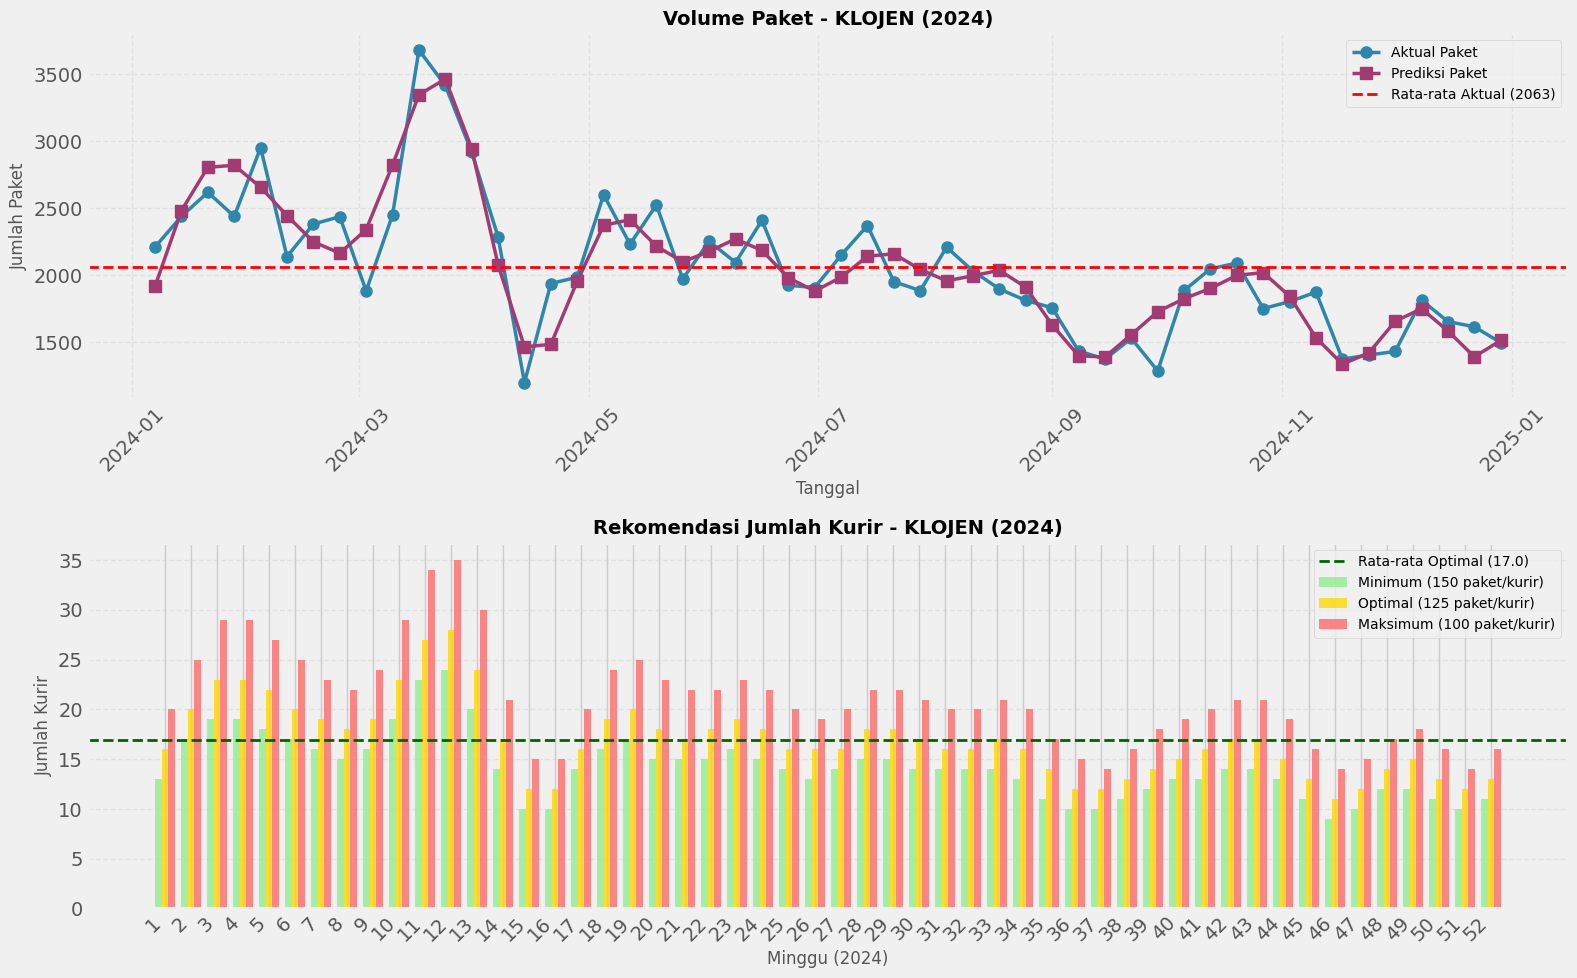


📍 Kecamatan: LOWOKWARU


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             833           911              6   
1  2024-01-14          2            1058          1016              8   
2  2024-01-21          3            1189          1023              8   
3  2024-01-28          4            1147          1479              8   
4  2024-02-04          5            1015           997              7   
5  2024-02-11          6             949           881              7   
6  2024-02-18          7            1018          1147              7   
7  2024-02-25          8            1162          1221              8   
8  2024-03-03          9            1267          1037              9   
9  2024-03-10         10            1277          1302              9   
10 2024-03-17         11            1221          1561              9   
11 2024-03-24         12            1151           981              8   
12 2024-03-31         13            1094          1275              8   
13 2024-04-07         14            1053          1015              8   
14 2024-04-14         15            1028           756              7   
15 2024-04-21         16            1025          1165              7   
16 2024-04-28         17            1036          1000              7   
17 2024-05-05         18            1042           959              7   
18 2024-05-12         19            1041           920              7   
19 2024-05-19         20            1049          1114              7   
20 2024-05-26         21            1079           961              8   
21 2024-06-02         22            1109          1211              8   
22 2024-06-09         23            1102          1095              8   
23 2024-06-16         24            1065          1042              8   
24 2024-06-23         25            1051          1003              8   
25 2024-06-30         26            1103          1239              8   
26 2024-07-07         27            1188          1154              8   
27 2024-07-14         28            1217          1159              9   
28 2024-07-21         29            1153          1226              8   
29 2024-07-28         30            1068          1048              8   
30 2024-08-04         31            1081          1021              8   
31 2024-08-11         32            1223          1317              9   
32 2024-08-18         33            1388          1373             10   
33 2024-08-25         34            1438          1541             10   
34 2024-09-01         35            1342          1563              9   
35 2024-09-08         36            1212          1187              9   
36 2024-09-15         37            1171          1192              8   
37 2024-09-22         38            1229          1292              9   
38 2024-09-29         39            1289          1262              9   
39 2024-10-06         40            1269          1400              9   
40 2024-10-13         41            1196          1060              8   
41 2024-10-20         42            1154          1269              8   
42 2024-10-27         43            1177          1240              8   
43 2024-11-03         44            1215          1143              9   
44 2024-11-10         45            1211          1293              9   
45 2024-11-17         46            1179          1156              8   
46 2024-11-24         47            1179          1374              8   
47 2024-12-01         48            1218          1042              9   
48 2024-12-08         49            1224          1159              9   
49 2024-12-15         50            1130          1219              8   
50 2024-12-22         51             983          1062              7   
51 2024-12-29         52             924           985              7   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket              Status  
0               7               9             78            ✅ Ses


📊 Ringkasan Rekomendasi Kurir - LOWOKWARU (2024):
   Rata-rata Prediksi Paket: 1139 paket/minggu
   Rata-rata Aktual Paket: 1155 paket/minggu
   ─────────────────────────────────────────────────
   📦 Rekomendasi Kurir Minimum: 8.1 kurir (beban 150 paket/kurir)
   📦 Rekomendasi Kurir Optimal: 9.6 kurir (beban 125 paket/kurir)
   📦 Rekomendasi Kurir Maksimum: 11.9 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   🎯 REKOMENDASI: Sediakan 10 kurir tetap
   💡 Untuk minggu sibuk, tambahkan 6 kurir cadangan


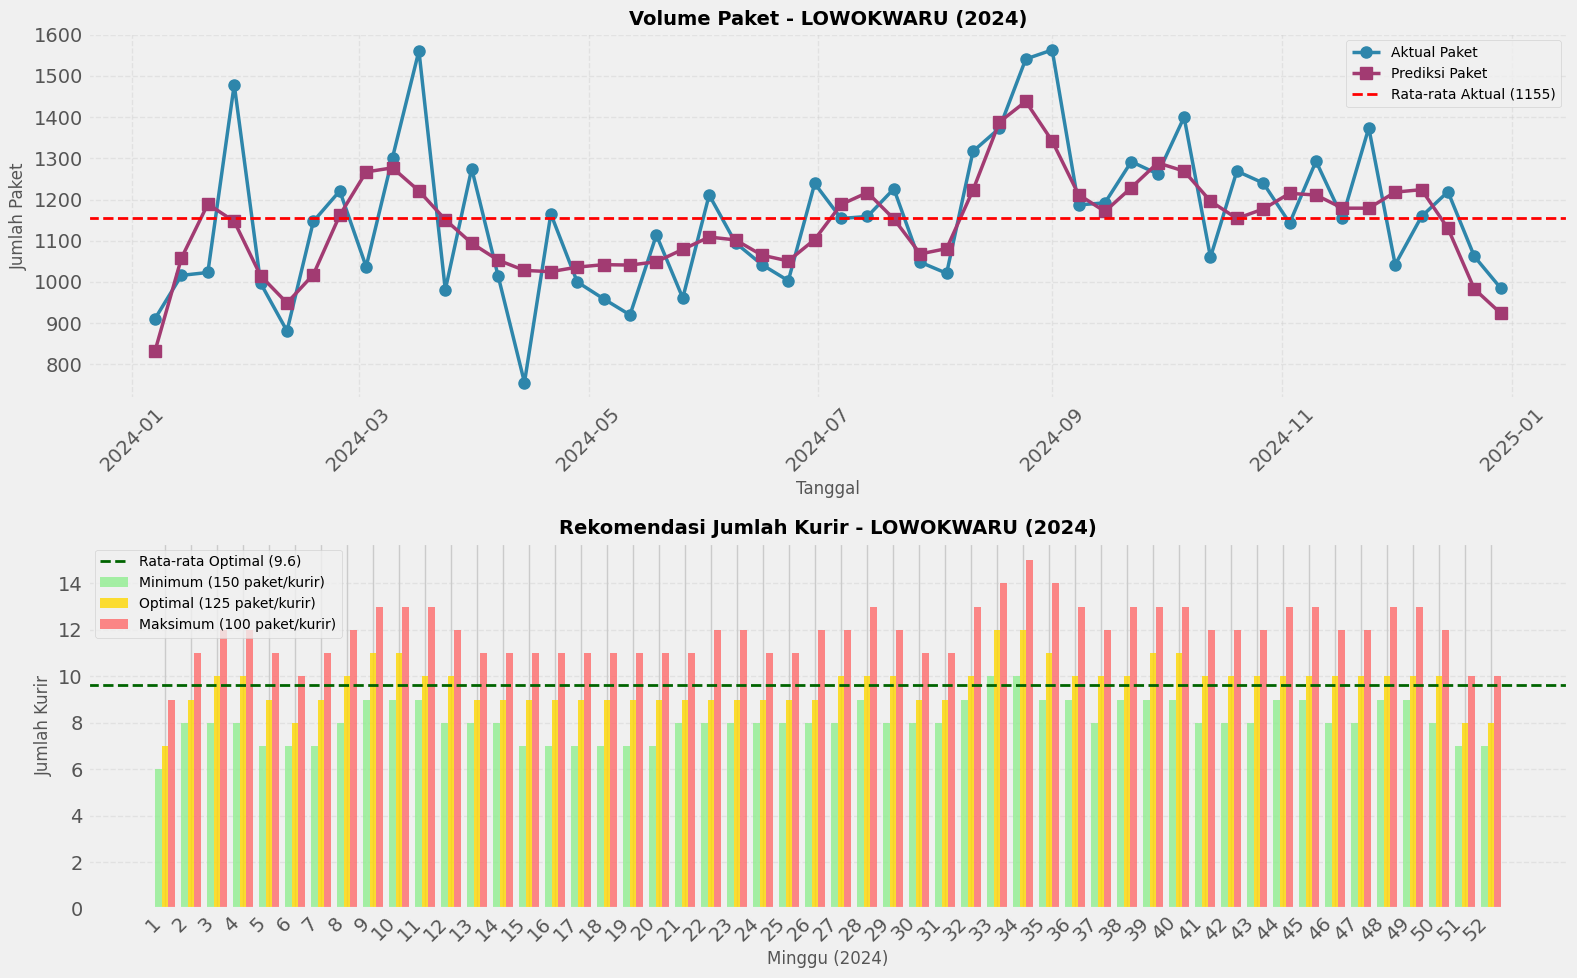


📍 Kecamatan: SUKUN


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             639           562              5   
1  2024-01-14          2             643           658              5   
2  2024-01-21          3             647           649              5   
3  2024-01-28          4             648           662              5   
4  2024-02-04          5             644           644              5   
5  2024-02-11          6             641           605              5   
6  2024-02-18          7             643           629              5   
7  2024-02-25          8             648           658              5   
8  2024-03-03          9             650           581              5   
9  2024-03-10         10             646           702              5   
10 2024-03-17         11             640           749              5   
11 2024-03-24         12             644           672              5   
12 2024-03-31         13             658           484              5   
13 2024-04-07         14             674           987              5   
14 2024-04-14         15             678          4023              5   
15 2024-04-21         16             667           595              5   
16 2024-04-28         17             650           599              5   
17 2024-05-05         18             640           609              5   
18 2024-05-12         19             641           562              5   
19 2024-05-19         20             648           663              5   
20 2024-05-26         21             651           570              5   
21 2024-06-02         22             648           688              5   
22 2024-06-09         23             645           611              5   
23 2024-06-16         24             645           632              5   
24 2024-06-23         25             649           577              5   
25 2024-06-30         26             651           766              5   
26 2024-07-07         27             651           782              5   
27 2024-07-14         28             650           796              5   
28 2024-07-21         29             650           782              5   
29 2024-07-28         30             651           747              5   
30 2024-08-04         31             652           701              5   
31 2024-08-11         32             652           794              5   
32 2024-08-18         33             652           855              5   
33 2024-08-25         34             651           737              5   
34 2024-09-01         35             651           768              5   
35 2024-09-08         36             651           631              5   
36 2024-09-15         37             649           697              5   
37 2024-09-22         38             648           654              5   
38 2024-09-29         39             650           577              5   
39 2024-10-06         40             651           772              5   
40 2024-10-13         41             652           614              5   
41 2024-10-20         42             651           734              5   
42 2024-10-27         43             651           749              5   
43 2024-11-03         44             652           647              5   
44 2024-11-10         45             654           803              5   
45 2024-11-17         46             653           687              5   
46 2024-11-24         47             652           764              5   
47 2024-12-01         48             652           584              5   
48 2024-12-08         49             654           764              5   
49 2024-12-15         50             656           798              5   
50 2024-12-22         51             654           804              5   
51 2024-12-29         52             651           751              5   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket              Status  
0               6               7            -77  ⚠️ Perlu Perhat


📊 Ringkasan Rekomendasi Kurir - SUKUN (2024):
   Rata-rata Prediksi Paket: 650 paket/minggu
   Rata-rata Aktual Paket: 752 paket/minggu
   ─────────────────────────────────────────────────
   📦 Rekomendasi Kurir Minimum: 5.0 kurir (beban 150 paket/kurir)
   📦 Rekomendasi Kurir Optimal: 6.0 kurir (beban 125 paket/kurir)
   📦 Rekomendasi Kurir Maksimum: 7.0 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   🎯 REKOMENDASI: Sediakan 6 kurir tetap
   💡 Untuk minggu sibuk, tambahkan 1 kurir cadangan


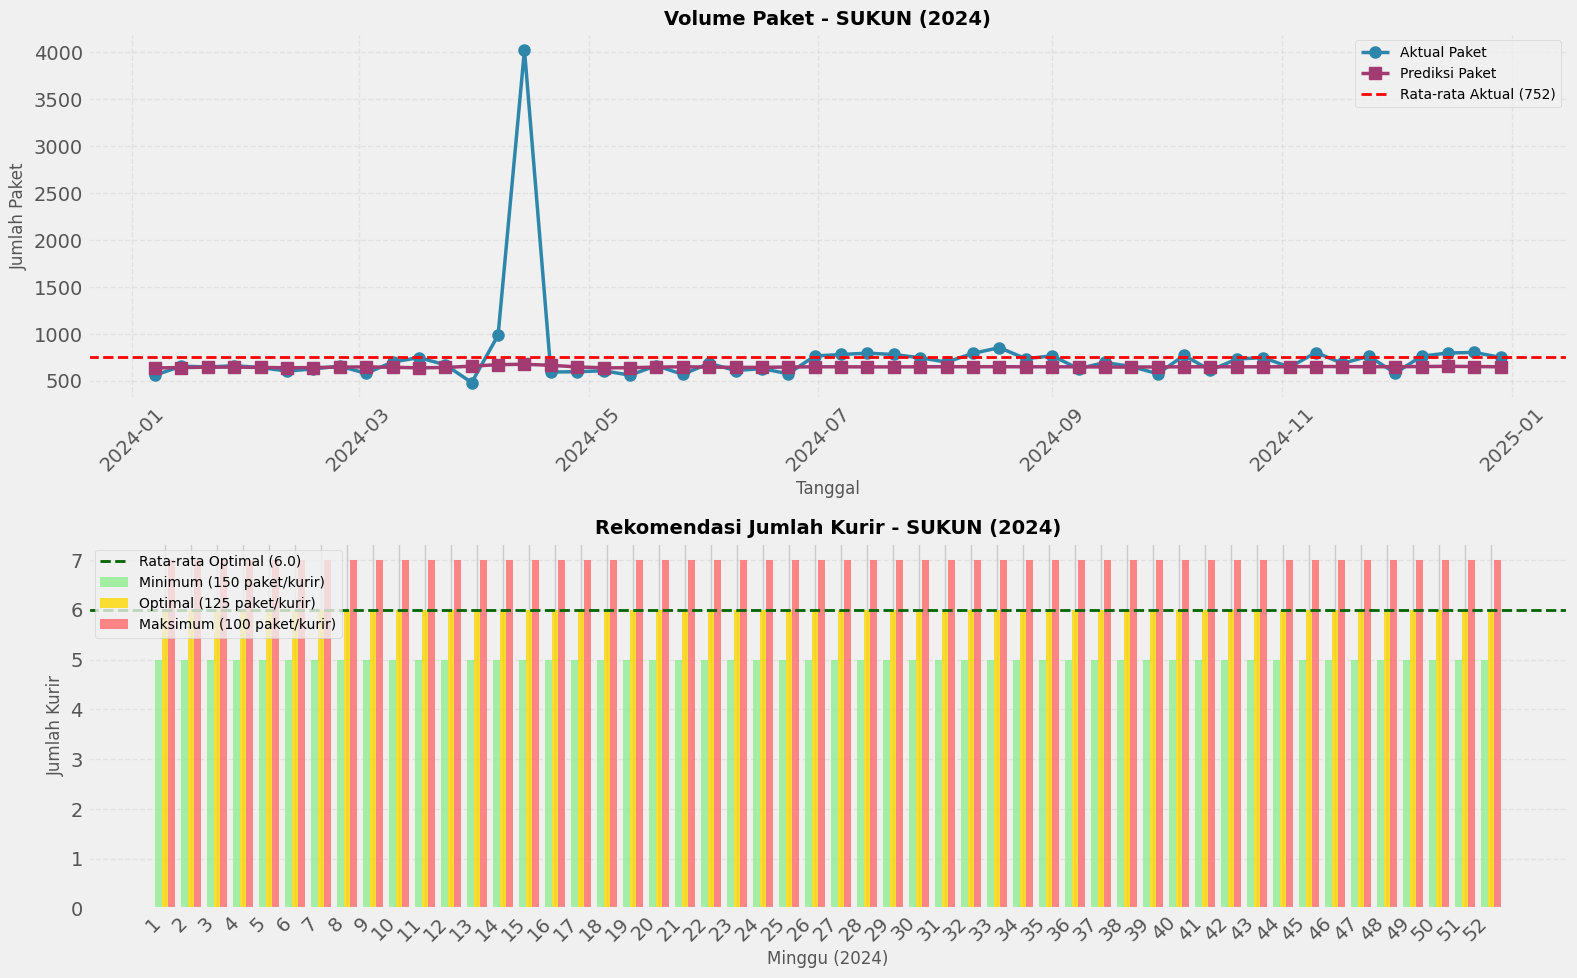


🏆 RINGKASAN REKOMENDASI KURIR - SEMUA KECAMATAN (2024)



Kecamatan  Rata2_Paket_Prediksi  Rata2_Paket_Aktual  Kurir_Minimum  \
0       BLIMBING                   908                 923              7   
1  KEDUNGKANDANG                   675                 688              5   
2         KLOJEN                  2054                2063             14   
3      LOWOKWARU                  1138                1154              8   
4          SUKUN                   650                 752              5   

   Kurir_Optimal  Kurir_Maksimum MAPE_%  
0              8              10  10.52  
1              6               7   9.09  
2             17              21   8.63  
3             10              12   8.59  
4              6               7  12.29


💼 Total Kebutuhan Kurir (Semua Kecamatan):
   Minimum: 39 kurir
   Optimal: 47 kurir ⭐ REKOMENDASI
   Maksimum: 57 kurir

✅ Analisis Rekomendasi Kurir Selesai!


In [18]:
# Rekomendasi Jumlah Kurir berdasarkan Prediksi 2024
print("👥 Menghitung Rekomendasi Jumlah Kurir untuk tahun 2024...")
print("📦 Asumsi: 1 kurir dapat menangani 100-150 paket per minggu\n")

# Definisikan kapasitas kurir
KAPASITAS_KURIR_MIN = 100  # paket per minggu per kurir (beban tinggi)
KAPASITAS_KURIR_MAX = 150  # paket per minggu per kurir (beban normal)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*90}")
    print(f"📍 Kecamatan: {kecamatan}")
    print(f"{'='*90}")
    
    # Ambil data dari hasil prediksi
    result = predictions_results[kecamatan]
    test_data = result['test'].copy()
    test_pred = result['test_predictions'].copy()
    
    # Filter hanya untuk tahun 2024
    test_data_2024 = test_data[test_data['Tgl_Kirim'].dt.year == 2024].copy()
    test_pred_2024 = test_pred[test_pred['ds'].dt.year == 2024].copy()
    
    # Buat tabel rekomendasi kurir
    kurir_recommendation = pd.DataFrame({
        'Tanggal': test_data_2024['Tgl_Kirim'].values,
        'Minggu_Ke': test_data_2024['minggu_ke'].values,
        'Prediksi_Paket': test_pred_2024['yhat'].round(0).astype(int).values,
        'Aktual_Paket': test_data_2024['total paket'].values,
        'Kurir_Minimum': np.ceil(test_pred_2024['yhat'] / KAPASITAS_KURIR_MAX).astype(int).values,
        'Kurir_Optimal': np.ceil(test_pred_2024['yhat'] / 125).astype(int).values,  # rata-rata 125
        'Kurir_Maksimum': np.ceil(test_pred_2024['yhat'] / KAPASITAS_KURIR_MIN).astype(int).values,
    })
    
    # Hitung selisih prediksi vs aktual
    kurir_recommendation['Selisih_Paket'] = (kurir_recommendation['Aktual_Paket'] - 
                                              kurir_recommendation['Prediksi_Paket'])
    
    # Rekomendasi status
    def get_status(pred, actual):
        diff_pct = abs(actual - pred) / actual * 100
        if diff_pct < 10:
            return "✅ Sesuai"
        elif diff_pct < 30:
            return "⚠️ Perlu Perhatian"
        else:
            return "🔴 Kritis"
    
    kurir_recommendation['Status'] = kurir_recommendation.apply(
        lambda row: get_status(row['Prediksi_Paket'], row['Aktual_Paket']), axis=1
    )
    
    # Tampilkan tabel
    display(kurir_recommendation)
    
    # Statistik ringkasan
    print(f"\n📊 Ringkasan Rekomendasi Kurir - {kecamatan} (2024):")
    print(f"   Rata-rata Prediksi Paket: {kurir_recommendation['Prediksi_Paket'].mean():.0f} paket/minggu")
    print(f"   Rata-rata Aktual Paket: {kurir_recommendation['Aktual_Paket'].mean():.0f} paket/minggu")
    print(f"   ─────────────────────────────────────────────────")
    print(f"   📦 Rekomendasi Kurir Minimum: {kurir_recommendation['Kurir_Minimum'].mean():.1f} kurir (beban 150 paket/kurir)")
    print(f"   📦 Rekomendasi Kurir Optimal: {kurir_recommendation['Kurir_Optimal'].mean():.1f} kurir (beban 125 paket/kurir)")
    print(f"   📦 Rekomendasi Kurir Maksimum: {kurir_recommendation['Kurir_Maksimum'].mean():.1f} kurir (beban 100 paket/kurir)")
    print(f"   ─────────────────────────────────────────────────")
    print(f"   🎯 REKOMENDASI: Sediakan {int(np.ceil(kurir_recommendation['Kurir_Optimal'].mean()))} kurir tetap")
    print(f"   💡 Untuk minggu sibuk, tambahkan {int(np.ceil(kurir_recommendation['Kurir_Maksimum'].max() - kurir_recommendation['Kurir_Optimal'].mean()))} kurir cadangan")
    
    # Visualisasi kebutuhan kurir
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
    
    # Plot 1: Prediksi Paket vs Aktual
    ax1.plot(kurir_recommendation['Tanggal'], kurir_recommendation['Aktual_Paket'], 
             marker='o', label='Aktual Paket', linewidth=2.5, markersize=8, color='#2E86AB')
    ax1.plot(kurir_recommendation['Tanggal'], kurir_recommendation['Prediksi_Paket'], 
             marker='s', label='Prediksi Paket', linewidth=2.5, markersize=8, color='#A23B72')
    ax1.axhline(y=kurir_recommendation['Aktual_Paket'].mean(), color='red', 
                linestyle='--', label=f'Rata-rata Aktual ({kurir_recommendation["Aktual_Paket"].mean():.0f})', linewidth=2)
    ax1.set_title(f'Volume Paket - {kecamatan} (2024)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Tanggal', fontsize=12)
    ax1.set_ylabel('Jumlah Paket', fontsize=12)
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.4, linestyle='--')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Rekomendasi Kurir
    x_pos = range(len(kurir_recommendation))
    width = 0.25
    
    ax2.bar([x - width for x in x_pos], kurir_recommendation['Kurir_Minimum'], 
            width, label='Minimum (150 paket/kurir)', color='#90EE90', alpha=0.8)
    ax2.bar(x_pos, kurir_recommendation['Kurir_Optimal'], 
            width, label='Optimal (125 paket/kurir)', color='#FFD700', alpha=0.8)
    ax2.bar([x + width for x in x_pos], kurir_recommendation['Kurir_Maksimum'], 
            width, label='Maksimum (100 paket/kurir)', color='#FF6B6B', alpha=0.8)
    
    ax2.axhline(y=kurir_recommendation['Kurir_Optimal'].mean(), color='darkgreen', 
                linestyle='--', label=f'Rata-rata Optimal ({kurir_recommendation["Kurir_Optimal"].mean():.1f})', linewidth=2)
    
    ax2.set_title(f'Rekomendasi Jumlah Kurir - {kecamatan} (2024)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Minggu (2024)', fontsize=12)
    ax2.set_ylabel('Jumlah Kurir', fontsize=12)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(kurir_recommendation['Minggu_Ke'], rotation=45, ha='right')
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.4, linestyle='--', axis='y')
    
    plt.tight_layout()
    plt.show()

# Summary untuk semua kecamatan
print(f"\n{'='*90}")
print("🏆 RINGKASAN REKOMENDASI KURIR - SEMUA KECAMATAN (2024)")
print(f"{'='*90}\n")

summary_kurir = []
for kecamatan in unique_kecamatan:
    result = predictions_results[kecamatan]
    test_data = result['test'].copy()
    test_pred = result['test_predictions'].copy()
    
    test_data_2024 = test_data[test_data['Tgl_Kirim'].dt.year == 2024].copy()
    test_pred_2024 = test_pred[test_pred['ds'].dt.year == 2024].copy()
    
    avg_pred = test_pred_2024['yhat'].mean()
    avg_actual = test_data_2024['total paket'].mean()
    
    summary_kurir.append({
        'Kecamatan': kecamatan,
        'Rata2_Paket_Prediksi': int(avg_pred),
        'Rata2_Paket_Aktual': int(avg_actual),
        'Kurir_Minimum': int(np.ceil(avg_pred / KAPASITAS_KURIR_MAX)),
        'Kurir_Optimal': int(np.ceil(avg_pred / 125)),
        'Kurir_Maksimum': int(np.ceil(avg_pred / KAPASITAS_KURIR_MIN)),
        'MAPE_%': f"{result['metrics']['MAPE']:.2f}"
    })

summary_df_kurir = pd.DataFrame(summary_kurir)
display(summary_df_kurir)

print(f"\n💼 Total Kebutuhan Kurir (Semua Kecamatan):")
print(f"   Minimum: {summary_df_kurir['Kurir_Minimum'].sum()} kurir")
print(f"   Optimal: {summary_df_kurir['Kurir_Optimal'].sum()} kurir ⭐ REKOMENDASI")
print(f"   Maksimum: {summary_df_kurir['Kurir_Maksimum'].sum()} kurir")

print(f"\n✅ Analisis Rekomendasi Kurir Selesai!")